# Survival Multiarmed Bandits

## Comparing several algorithms through numerical experiments on the MAGB setting

An initial budget $B_0 = b$ evolves with the received rewards, so as $B_t = b + R_t$.

## Import dependencies:

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy.stats import norm

from datetime import datetime
import pickle

#current date
date = datetime.now().strftime("%Y_%m_%d")

#save pickle
save_pickle = False

In [2]:
#matplolib with latex style
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

mpl.rcParams["figure.figsize"] = (8,5)

In [5]:
#Configure path for local packages
import setup

from magb.arms import RandomArm, BernoulliArm, GaussianArm, TruncGaussianArm
from magb.policies import FixedPolicy, GreedyPolicy, RandomPolicy, EpsilonGreedyPolicy, EmpiricalSumPolicy
from magb.policies import ExploreThenExploitPolicy, SequentialExploreThenExploitPolicy, SequentialPolicy
from magb.policies import SoftMaxPolicy, UCBPolicy, ThompsonPolicy, BayesUCBPolicy
from magb.policies import PositiveGreedyPolicy, GamblerUCBPolicy
from magb.simulator import SMAB

## Setting (k-Extended-Bernoulli-Arms)

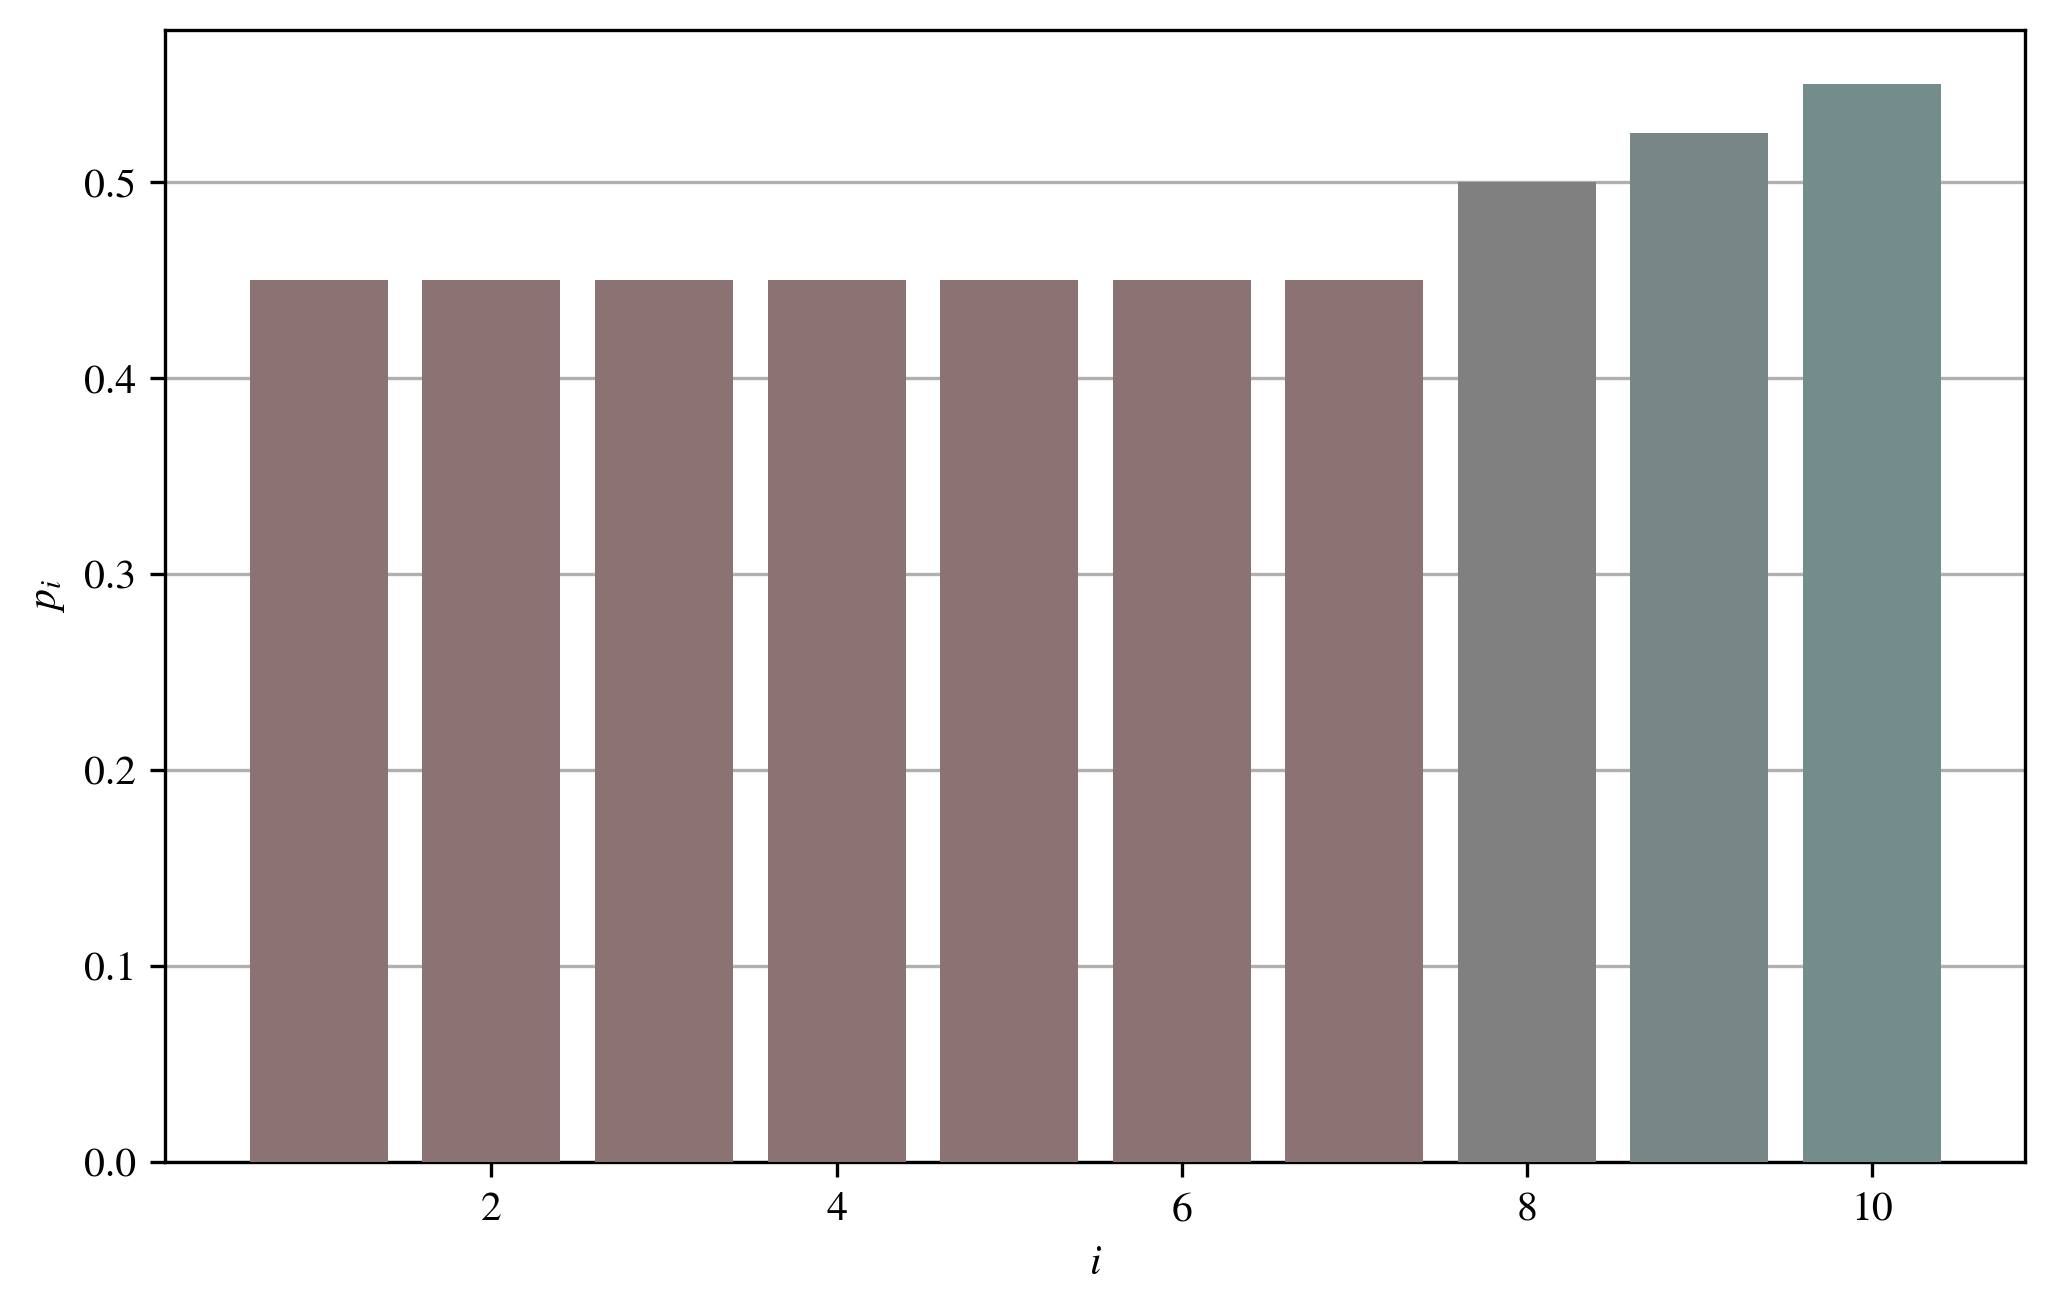

In [6]:
#number of arms and corresponding parameters
#k = 10
#p_arr = np.linspace(0.0, 0.6, k)
#p_arr = [0.325, 0.350, 0.375, 0.400, 0.425, 0.450, 0.475, 0.500, 0.525, 0.550]
p_arr = [0.45] * 7 + [0.500, 0.525, 0.550]
k = len(p_arr)

#Bernoulli
arms = [BernoulliArm(p, minr=-1.0, maxr=+1.0) for p in p_arr]

#initial budget
b_0 = k
omega = k 

#each arm must be tried at least w times at beginning
w=1

fig, ax = plt.subplots(1)
ax.grid(visible=True, which='major', axis='y', zorder=0)
ax.set_xlabel('$i$')
ax.set_ylabel('$p_i$')
for i, p in enumerate(p_arr):
    ax.bar(i+1, p, zorder=3, color=(1-p, p, p, 1.0))
plt.show()

## Simulation : naive methods over short-horizon 

 - Several Repetitions 
 - Short Horizon

In [7]:
#algorithms
algs = [
     FixedPolicy(k, w=w, fixed_i=1, label="Worst Arm"),
     FixedPolicy(k, w=w, fixed_i=k-1, label="Worst Positive Arm"),
     FixedPolicy(k, w=w, fixed_i=k-2, label="Neutral Arm"),
     FixedPolicy(k, w=w, fixed_i=k-3, label="Best Negative Arm"),
     FixedPolicy(k, w=w, fixed_i=k, label="Best Arm"),
     RandomPolicy(k, w=w),
     GreedyPolicy(k, w=w),
    ]

In [8]:
#time-horizon
h = 1000

#repetitions
n = 200

sim1 = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim1.run(tqdm_leave=True)


  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
../../packages/magb\magb\simulator.py:309: RuntimeWarning: invalid value encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [9]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
smooth_window = 50

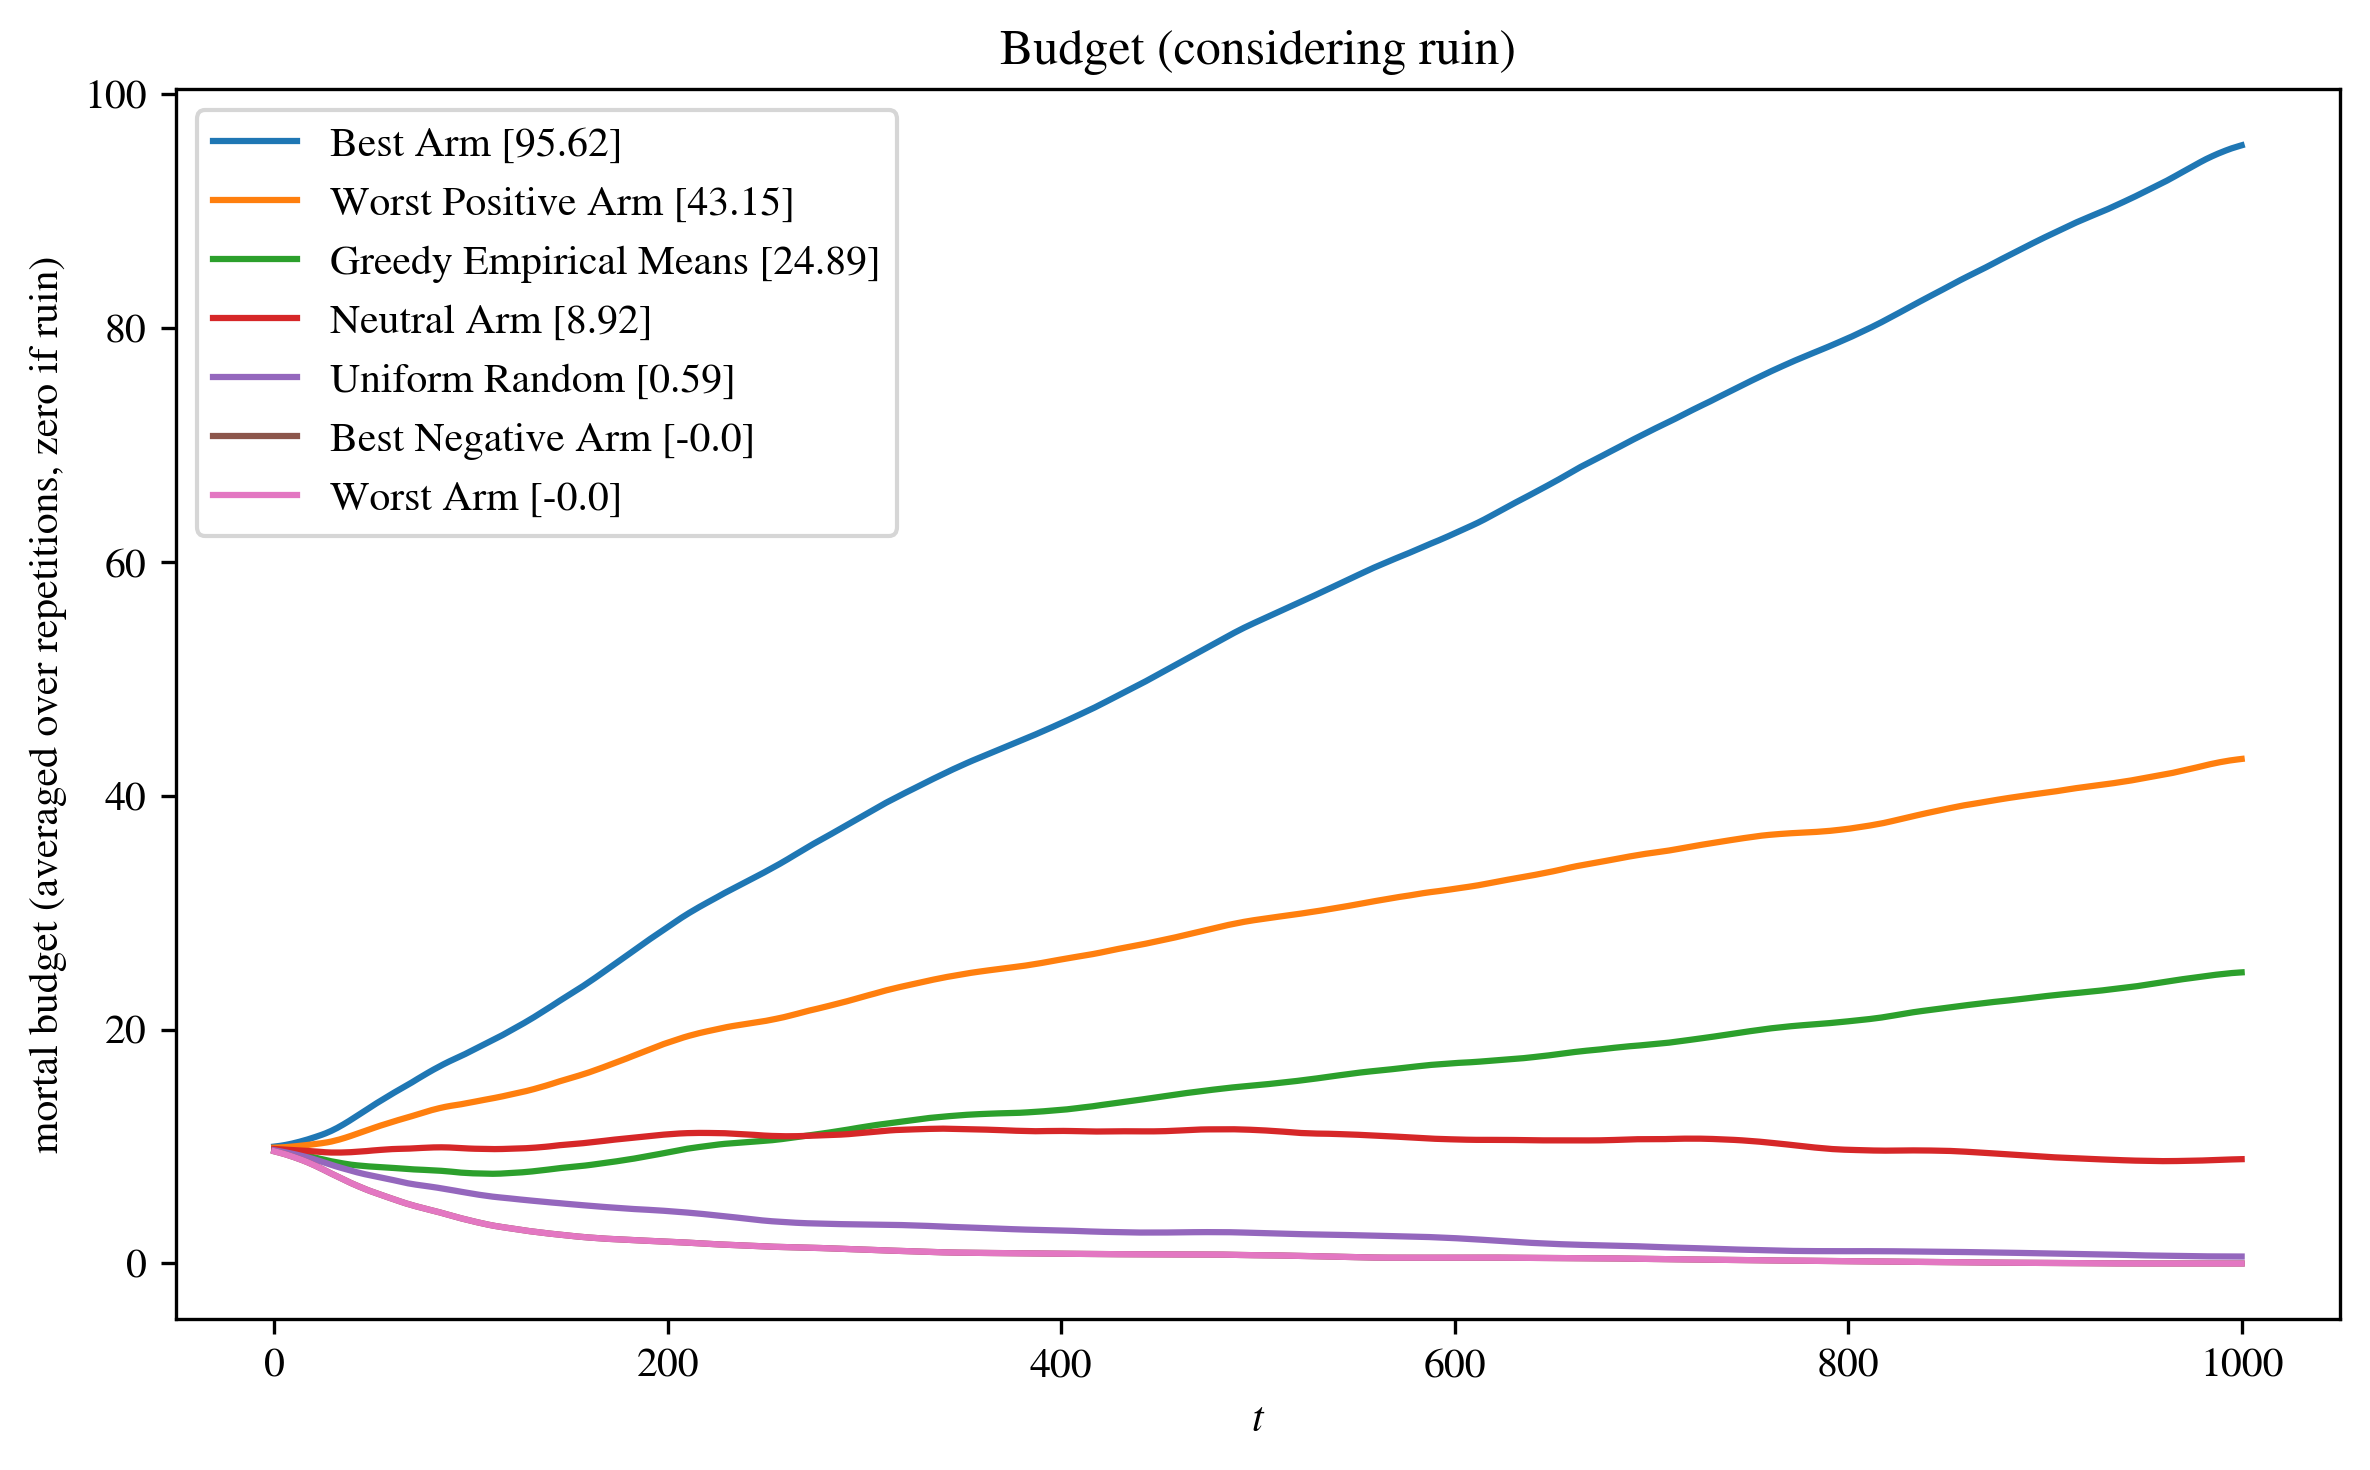

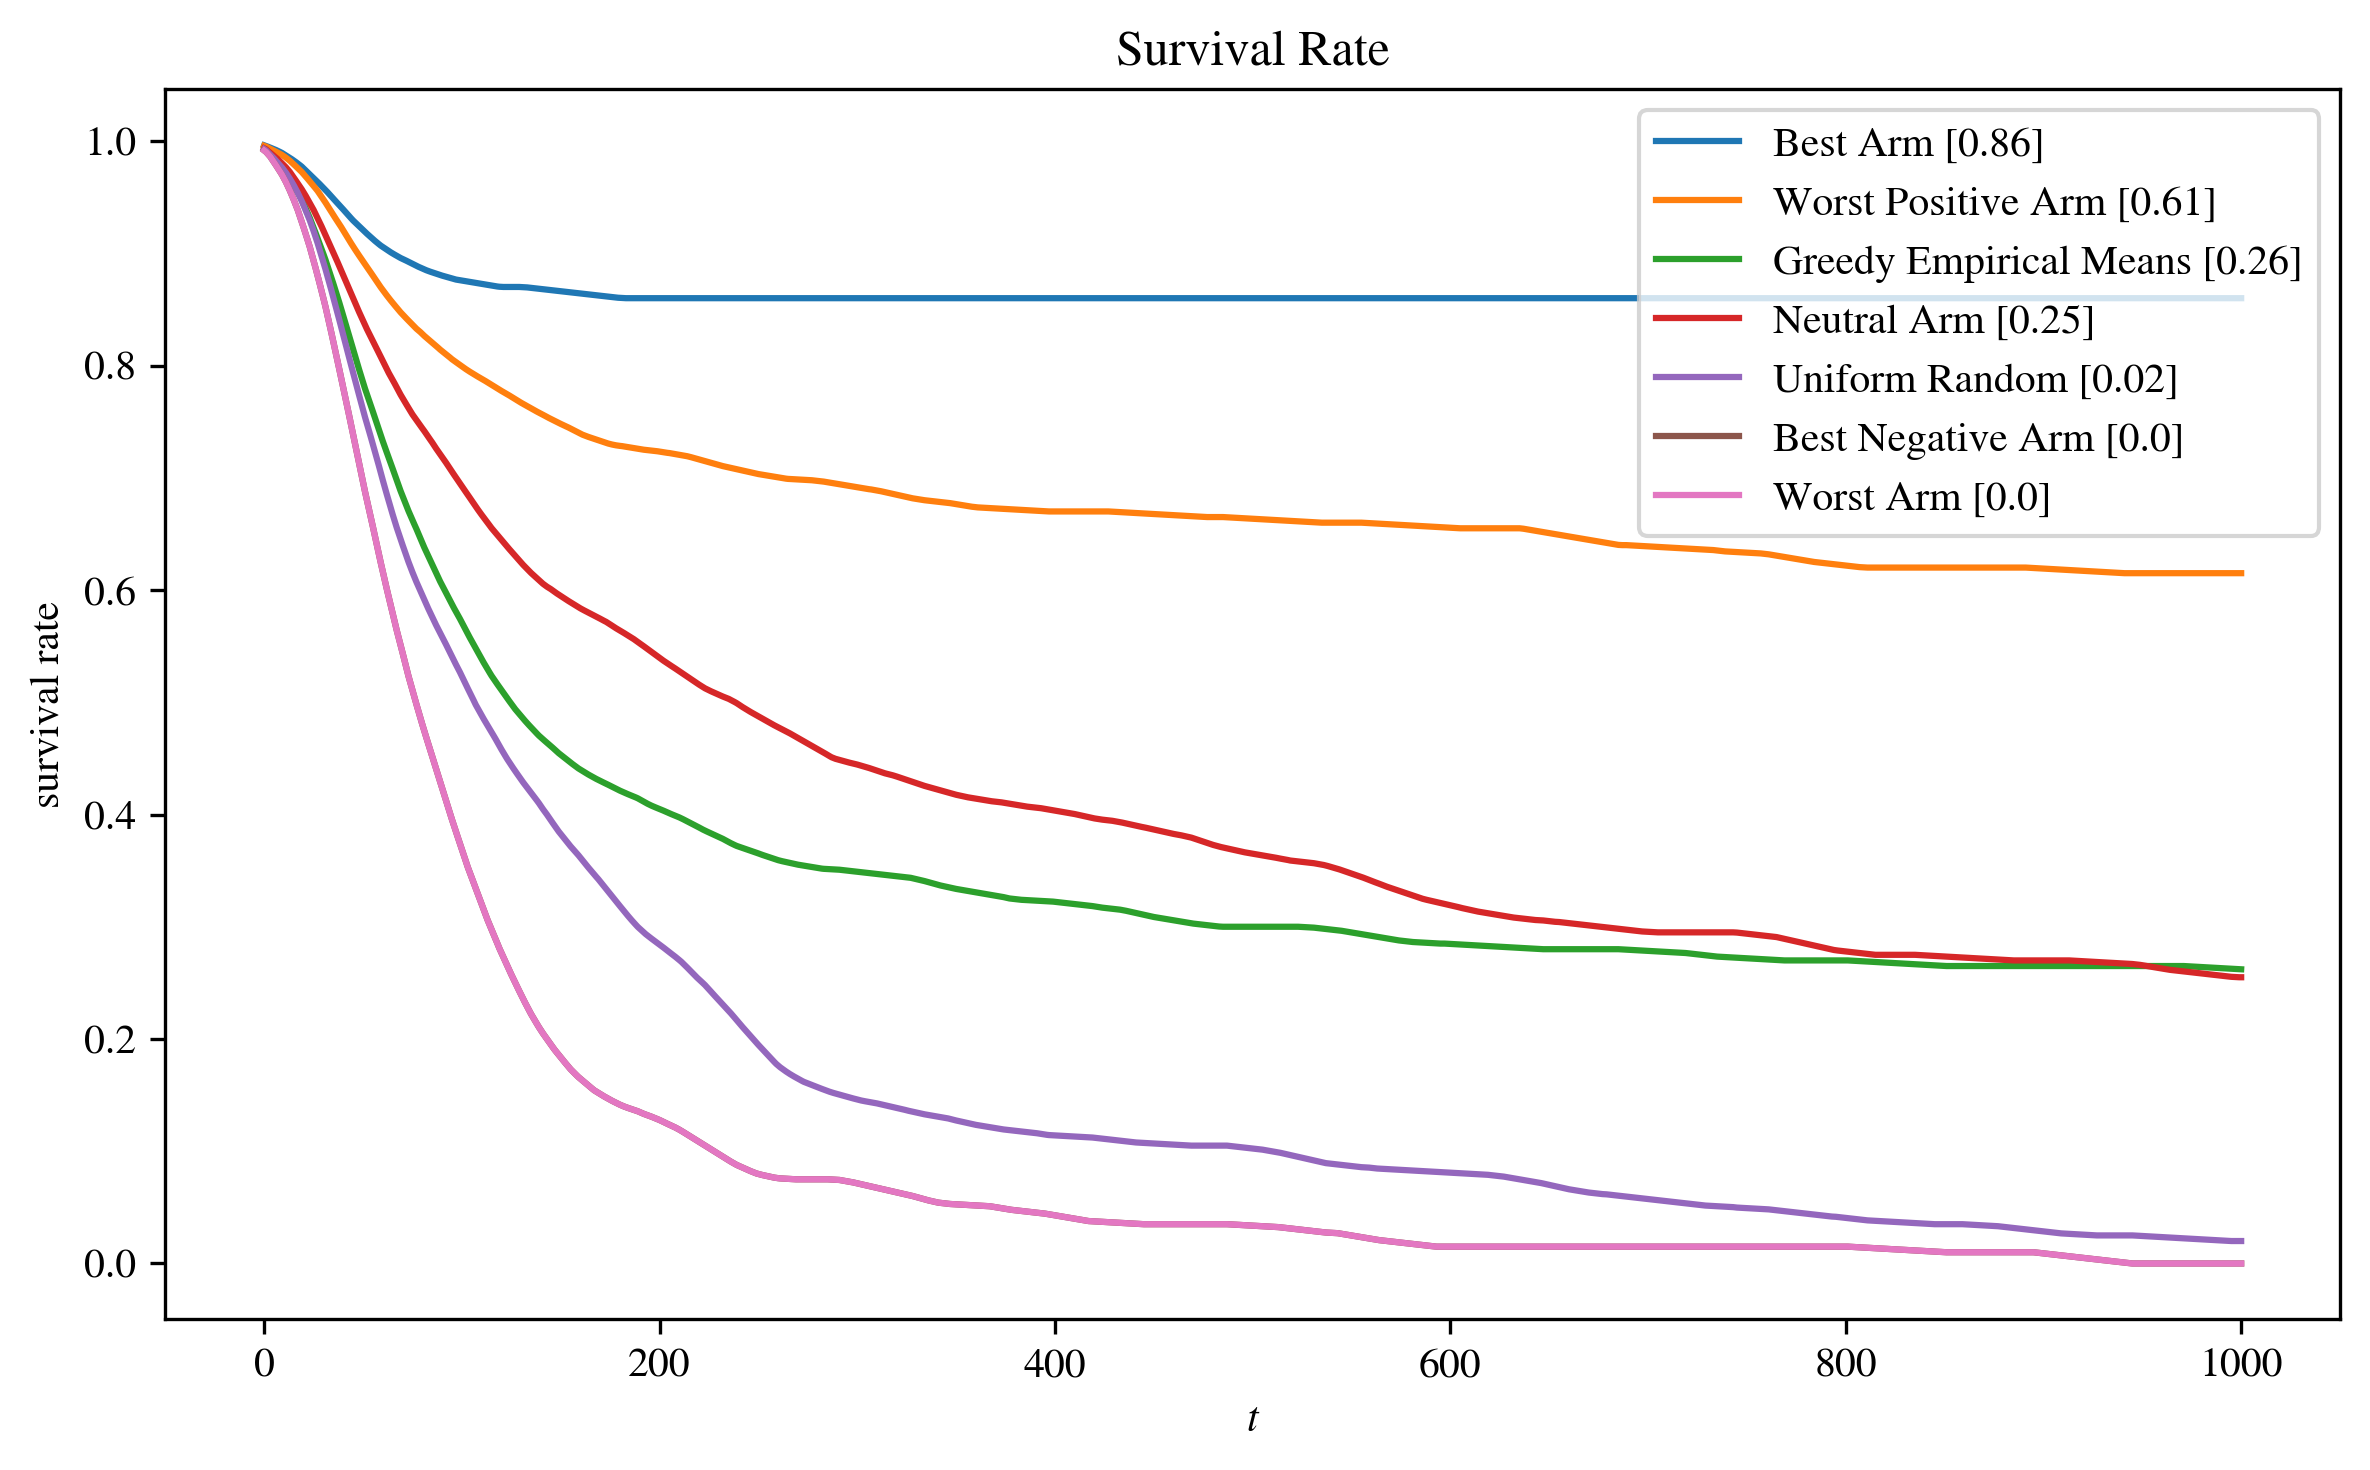

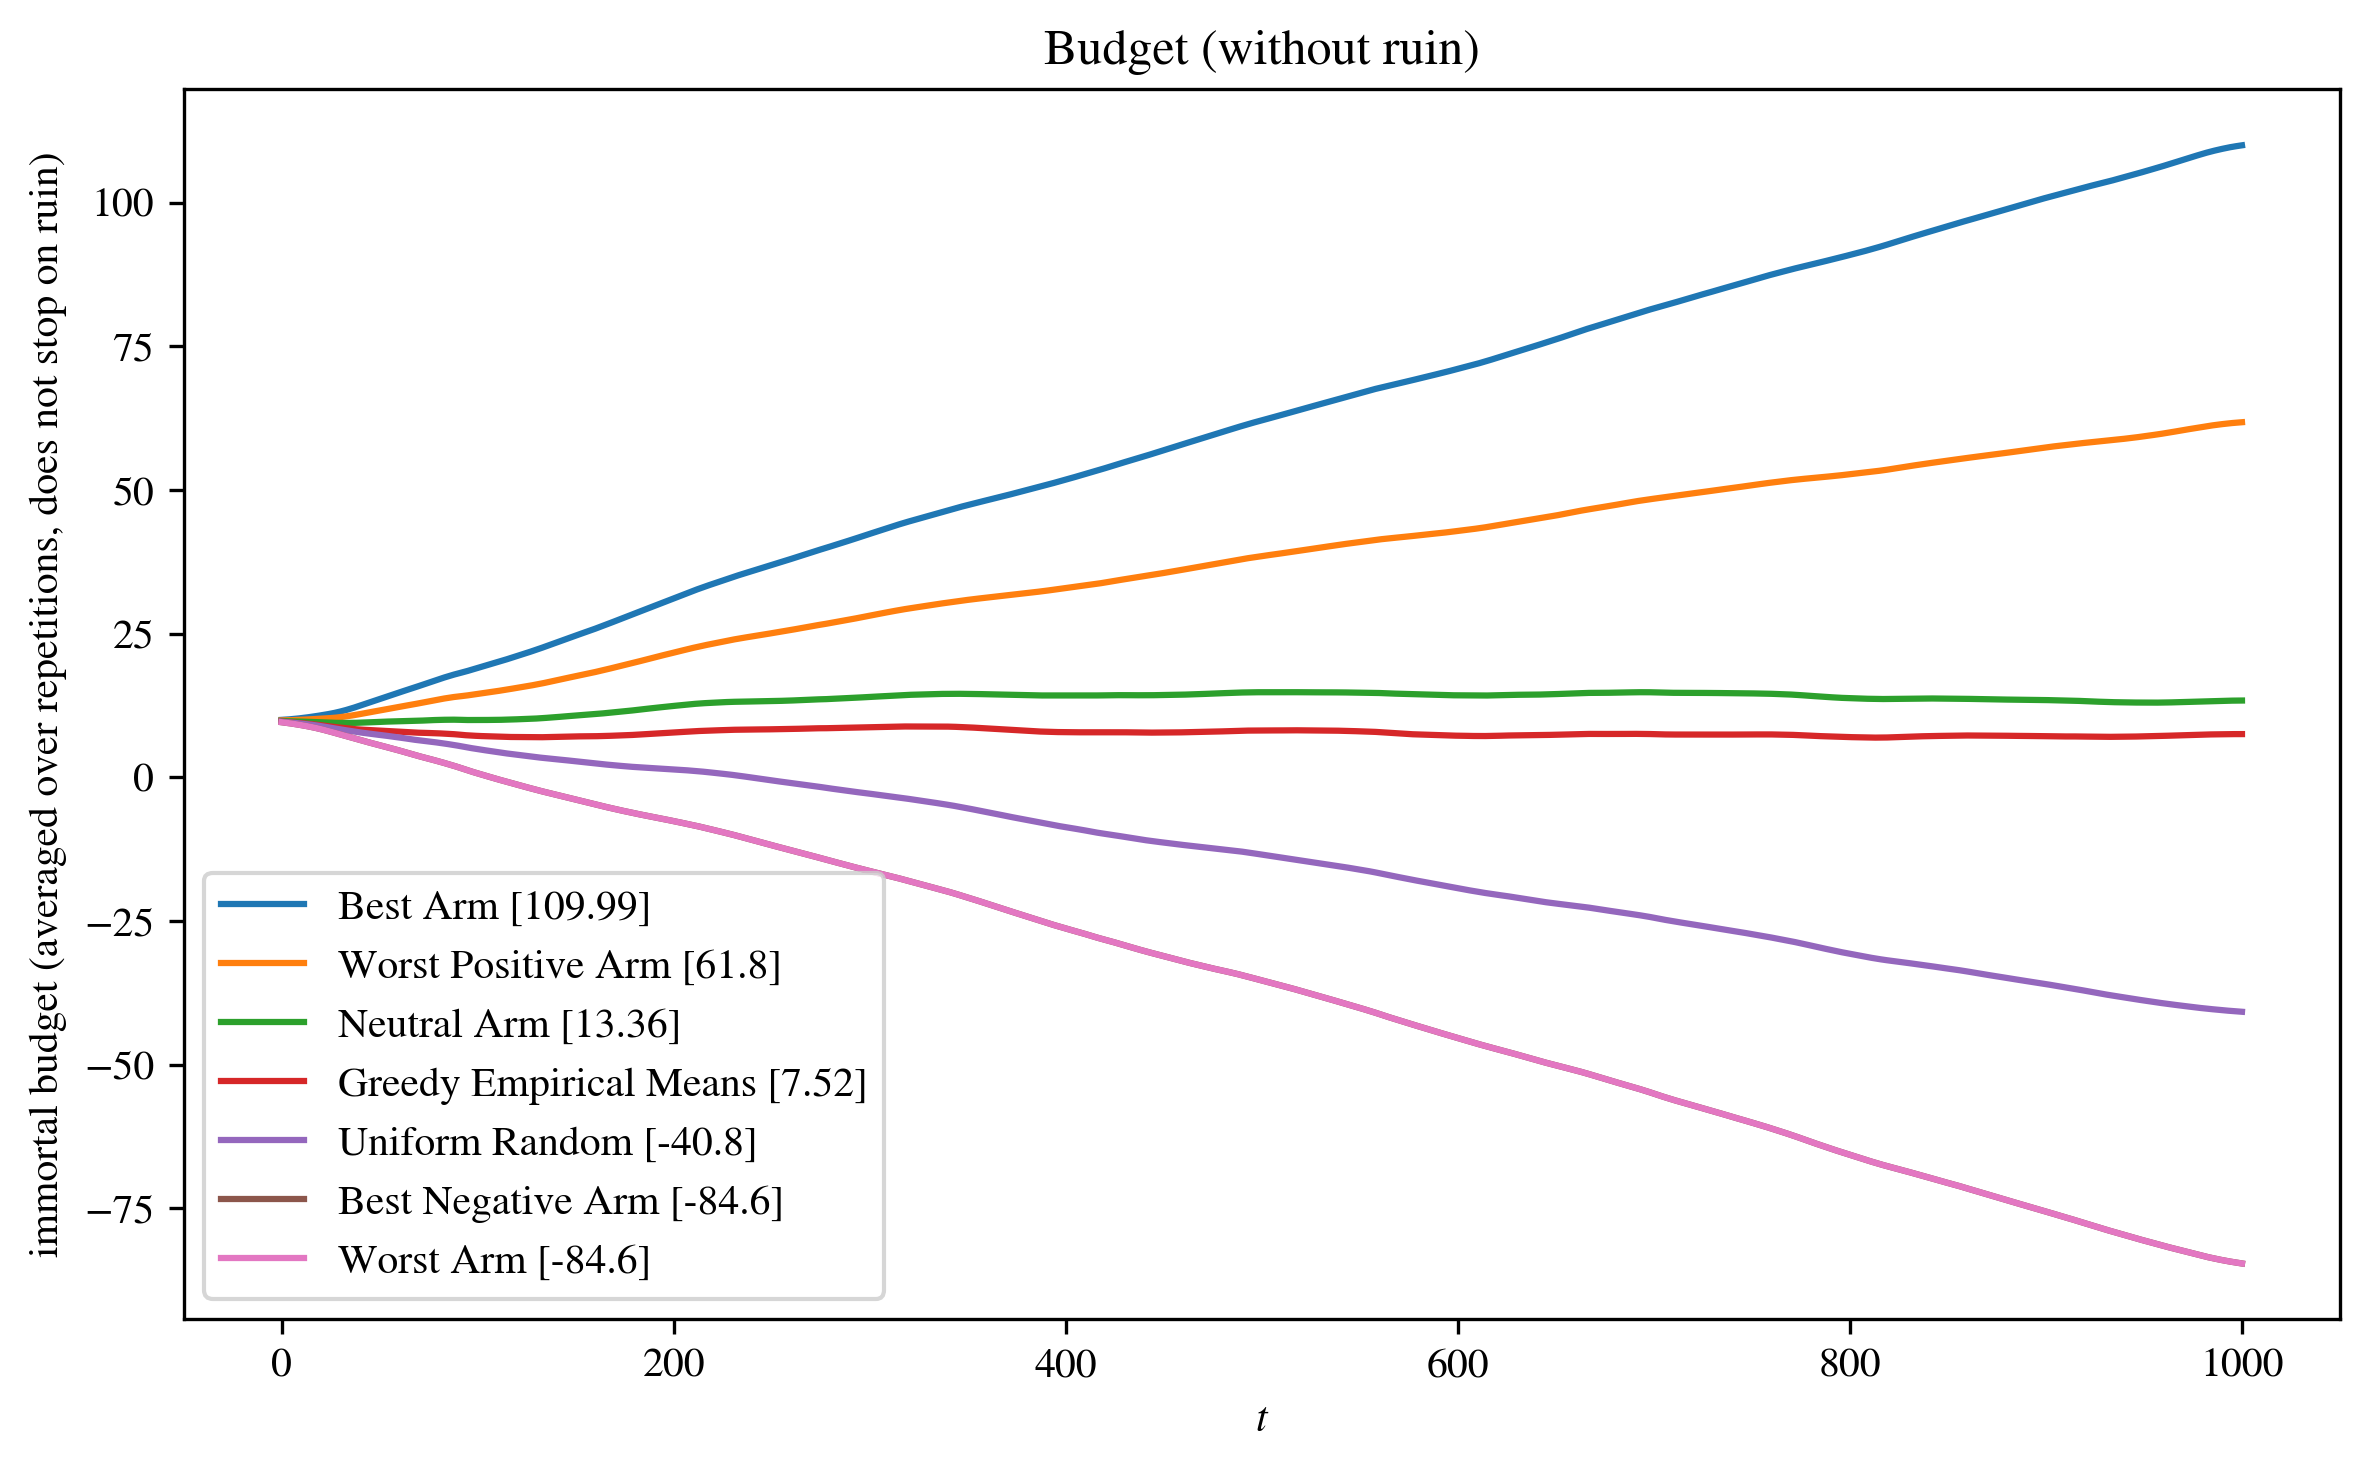

In [11]:
sim1.plot('mortal_budget', filename='mortal_budget.pdf',  smooth_window=smooth_window)
sim1.plot('survival', filename='survival.pdf',  smooth_window=smooth_window)
sim1.plot('immortal_budget', filename='immortal_budget.pdf',  smooth_window=smooth_window)


In [12]:
#algorithms
algs = [
     GreedyPolicy(k, w=w),
     EpsilonGreedyPolicy(k, w=w, eps=0.005, label="Eps 0.005"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.01, label="Eps 0.01"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.02, label="Eps 0.02"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.05, label="Eps 0.05"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.1, label="Eps 0.1"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.2, label="Eps 0.2"),
     EpsilonGreedyPolicy(k, w=w, eps=0.3, label="Eps 0.3"),
    ]

In [14]:
#time-horizon
h = 3000

#repetitions
n = 100

sim2 = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim2.run(tqdm_leave=True)


  0%|          | 0/100 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
../../packages/magb\magb\simulator.py:309: RuntimeWarning: invalid value encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]


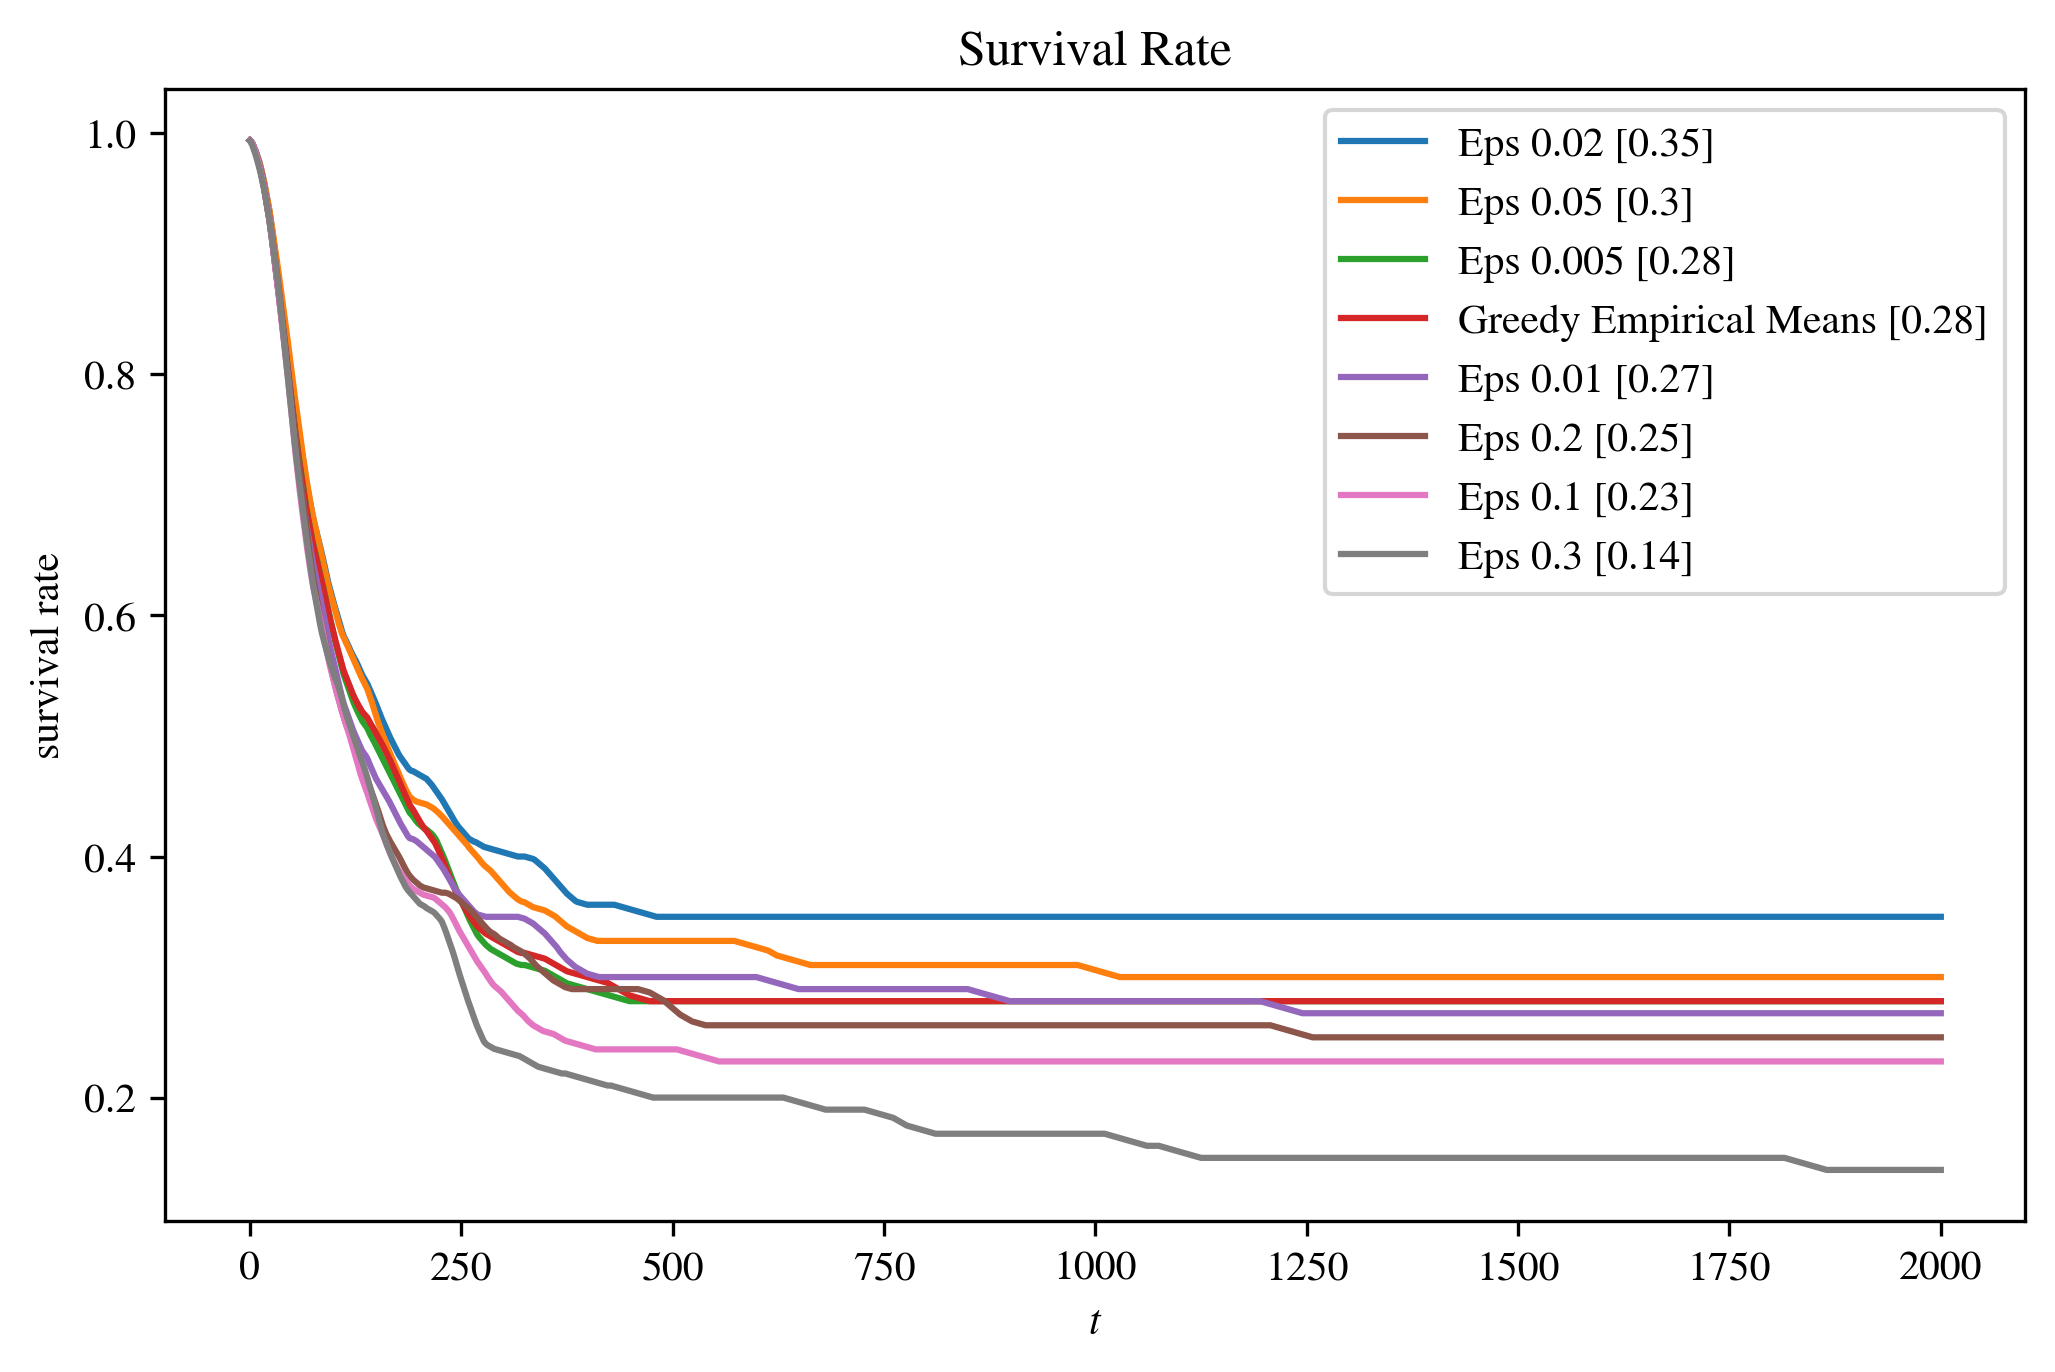

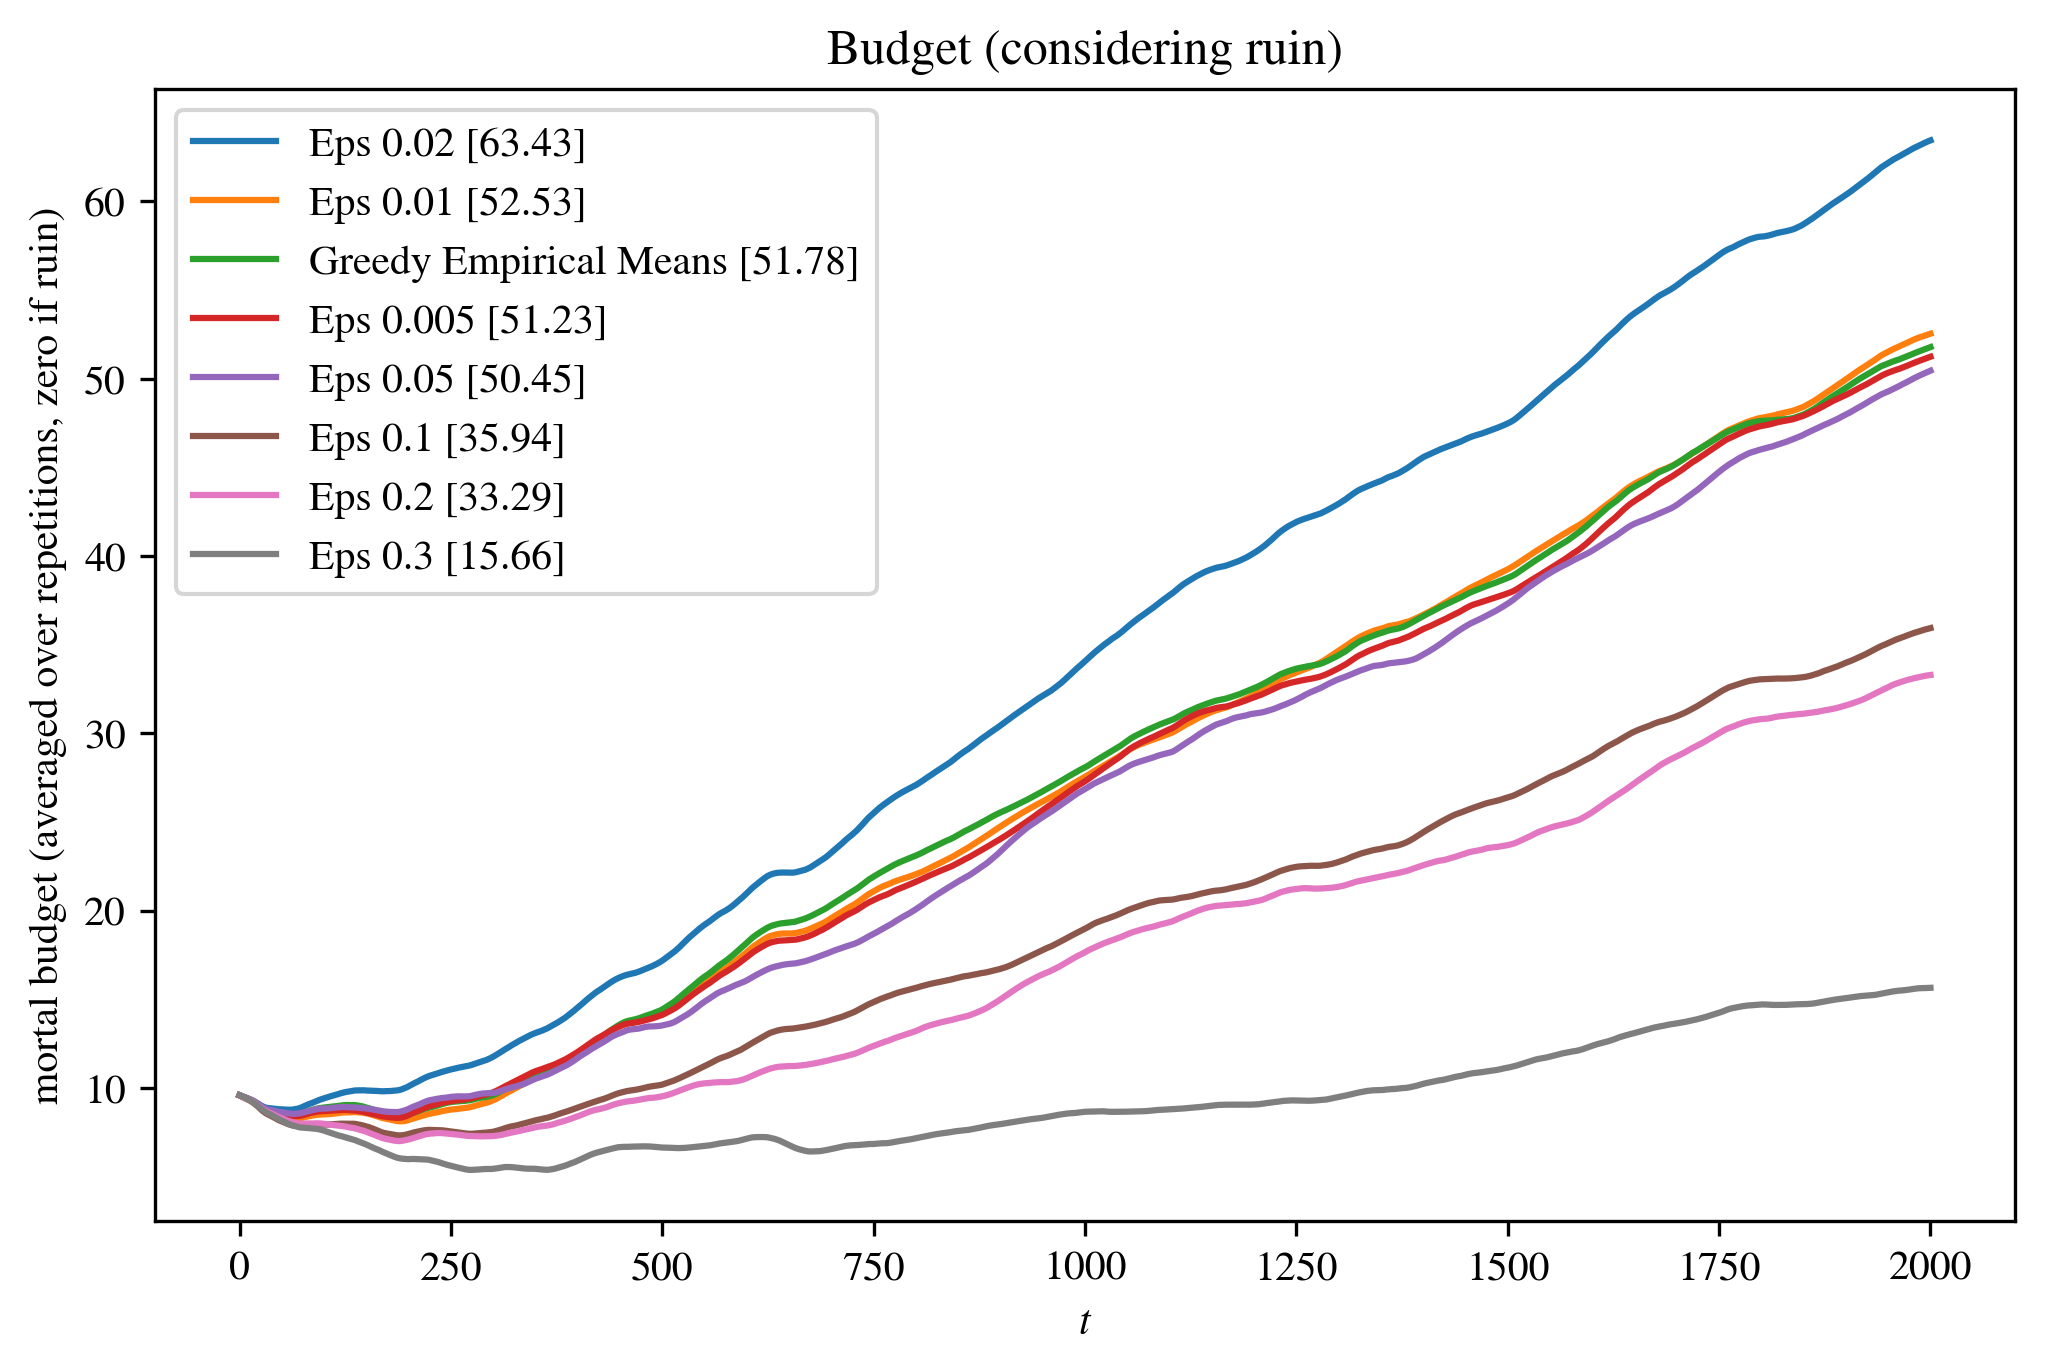

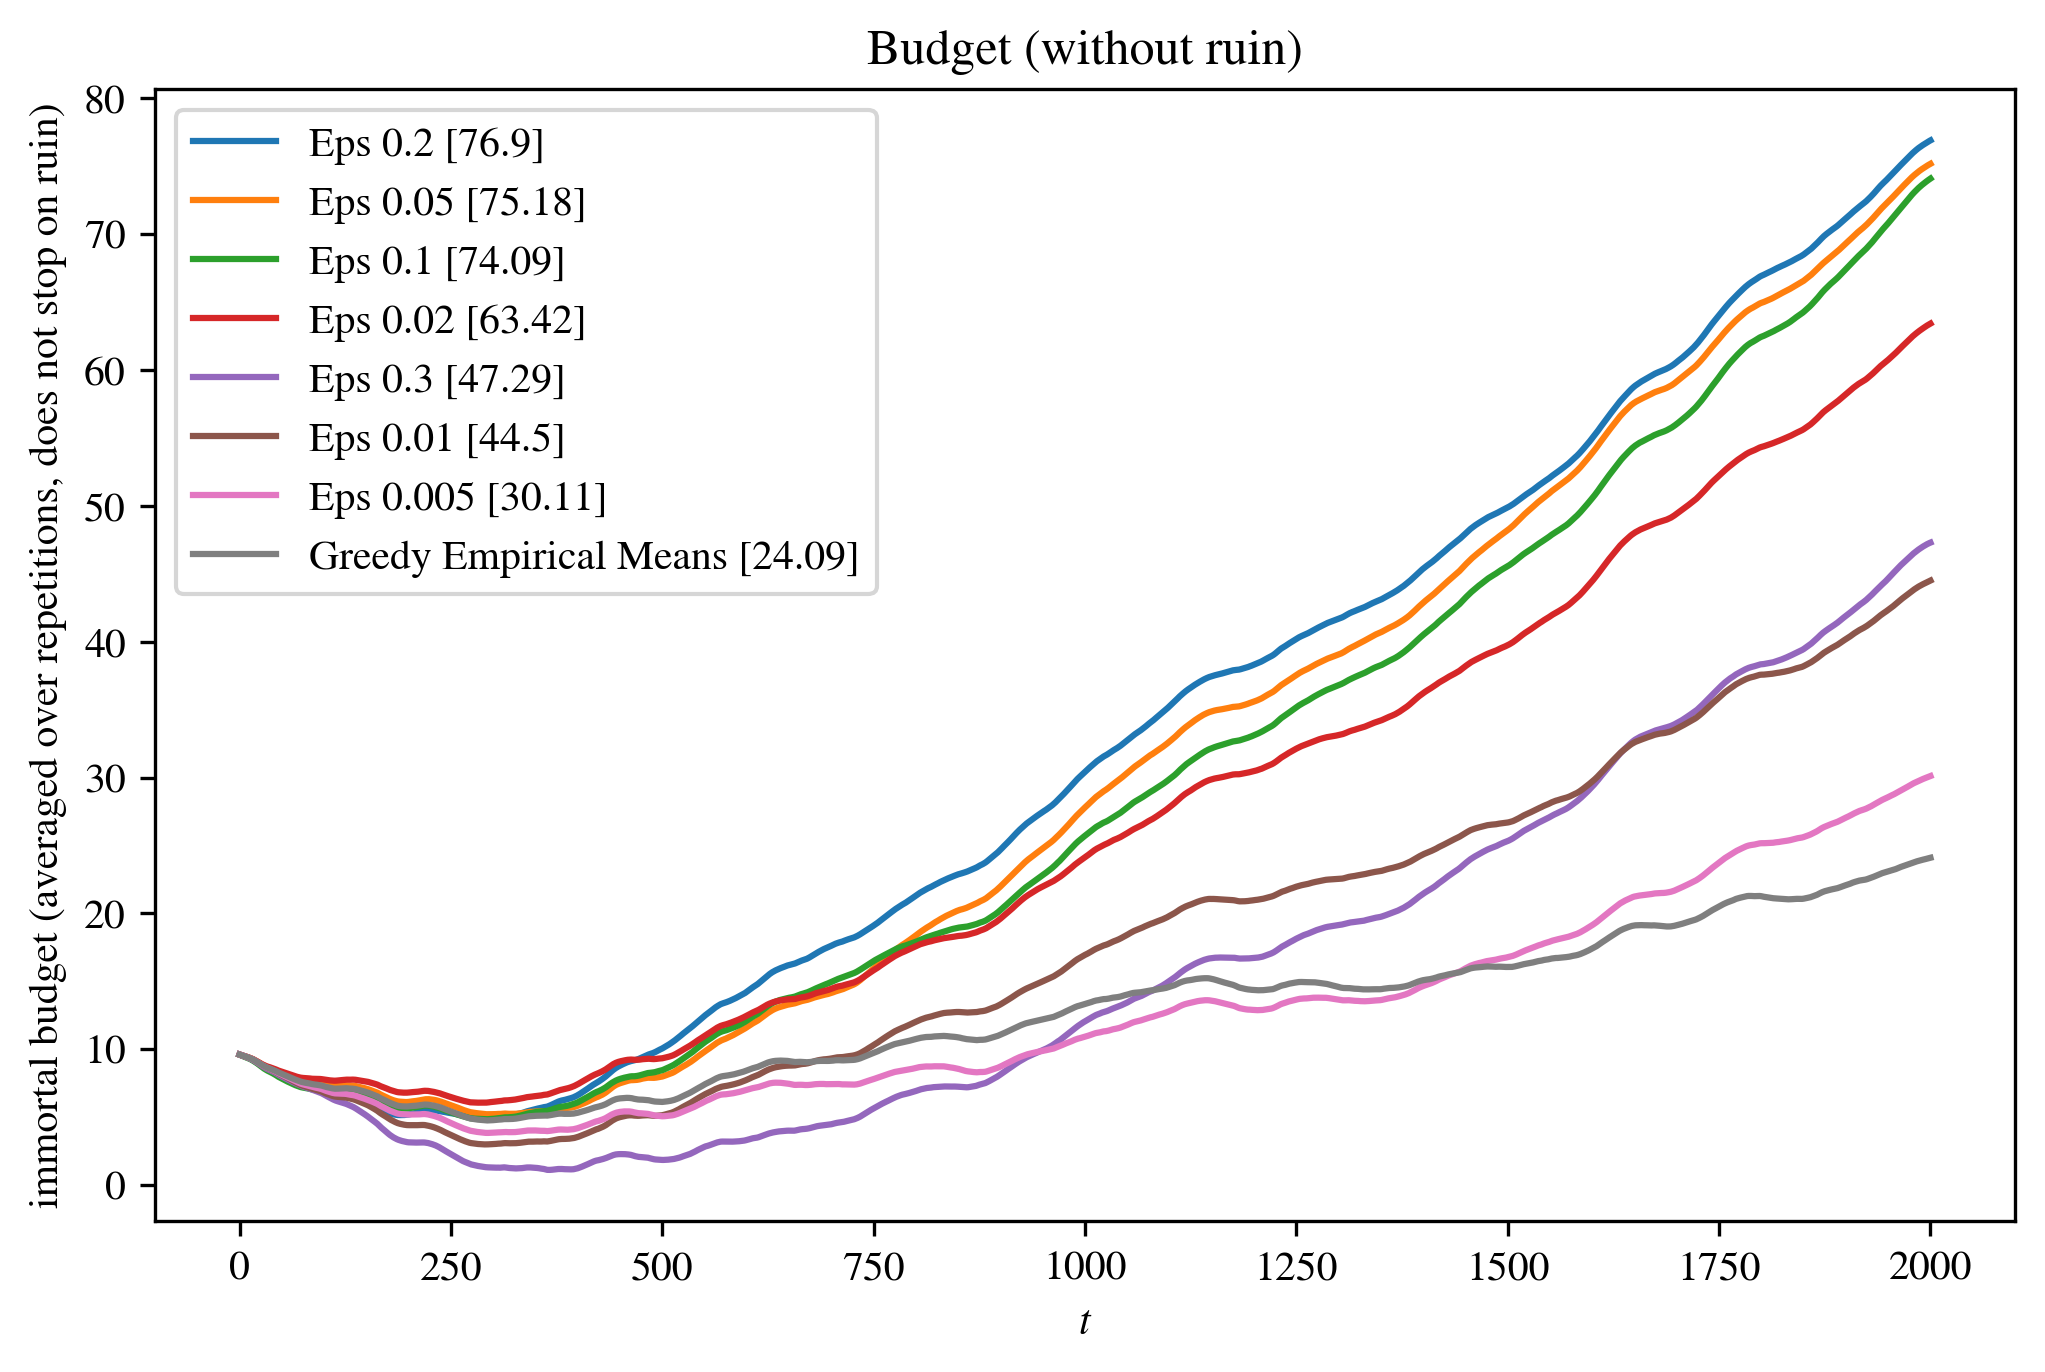

In [16]:
sim2.plot('survival',  smooth_window=smooth_window)
sim2.plot('mortal_budget',  smooth_window=smooth_window)
sim2.plot('immortal_budget',  smooth_window=smooth_window)


In [17]:
#algorithms
algs = [
     GreedyPolicy(k, w=w),
     EpsilonGreedyPolicy(k, w=w, eps=0.01, label="Eps 0.01"), 
     UCBPolicy(k, w=w, alpha=0.01, r_min=-1.0, r_max=1.0, label="UCB 0.01"),
     UCBPolicy(k, w=w, alpha=0.05, r_min=-1.0, r_max=1.0, label="UCB 0.05"),
     UCBPolicy(k, w=w, alpha=0.1, r_min=-1.0, r_max=1.0, label="UCB 0.1"),
     UCBPolicy(k, w=w, alpha=0.2, r_min=-1.0, r_max=1.0, label="UCB 0.2"),
     UCBPolicy(k, w=w, alpha=0.5, r_min=-1.0, r_max=1.0, label="UCB 0.5"),
     UCBPolicy(k, w=w, alpha=1.0, r_min=-1.0, r_max=1.0, label="UCB 1.0"),
     UCBPolicy(k, w=w, alpha=2.0, r_min=-1.0, r_max=1.0, label="UCB 2.0"),
    ]


In [18]:
#time-horizon
h = 1000

#repetitions
n = 100

sim3 = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim3.run(tqdm_leave=True)

  0%|          | 0/100 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
../../packages/magb\magb\simulator.py:309: RuntimeWarning: invalid value encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


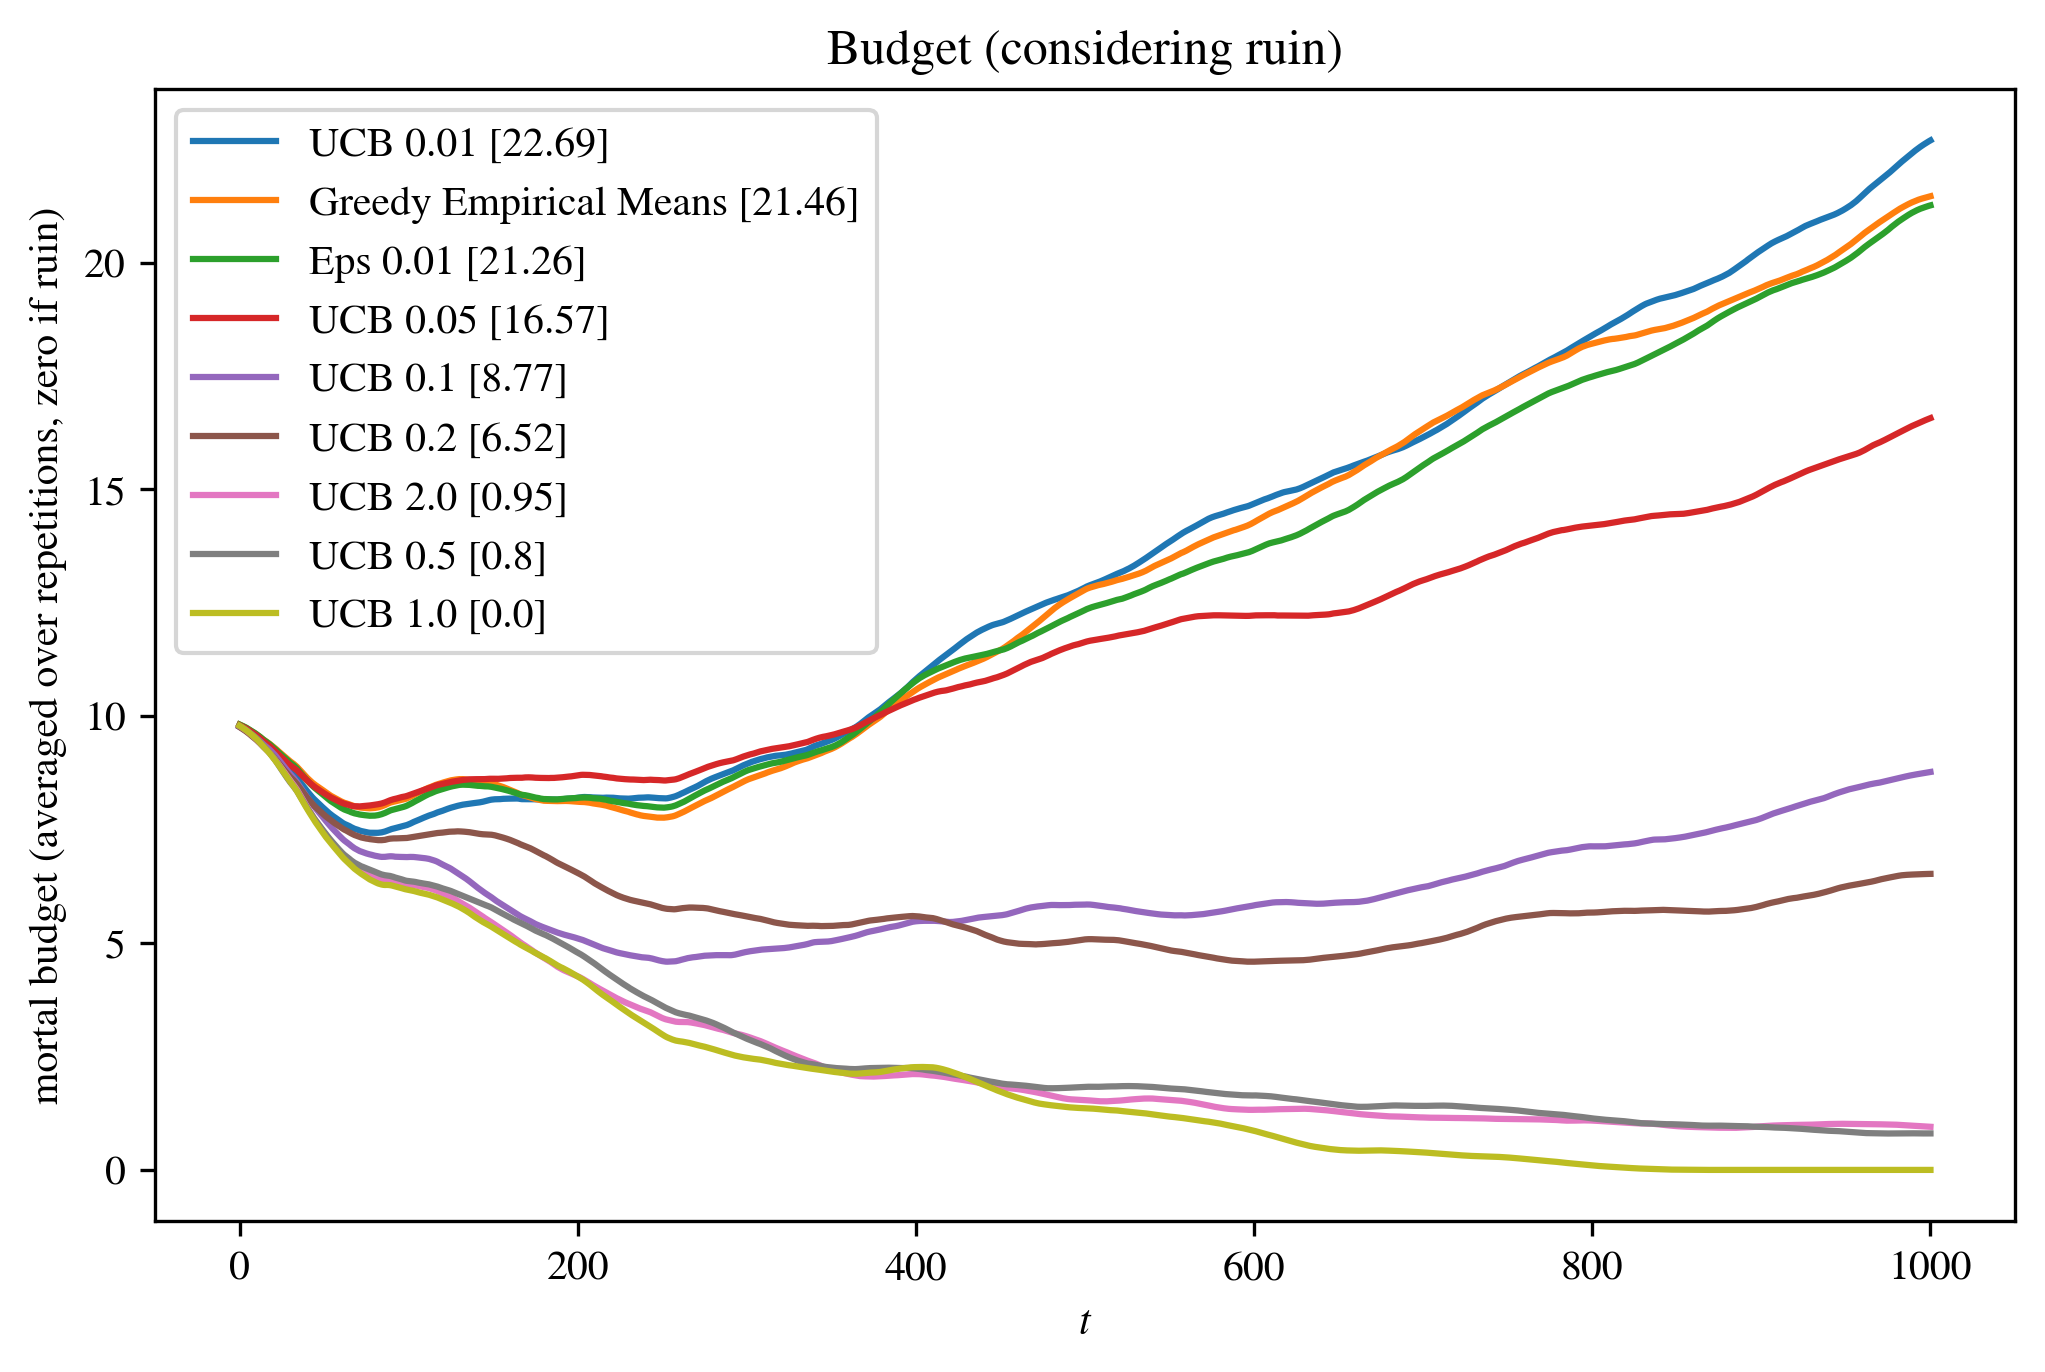

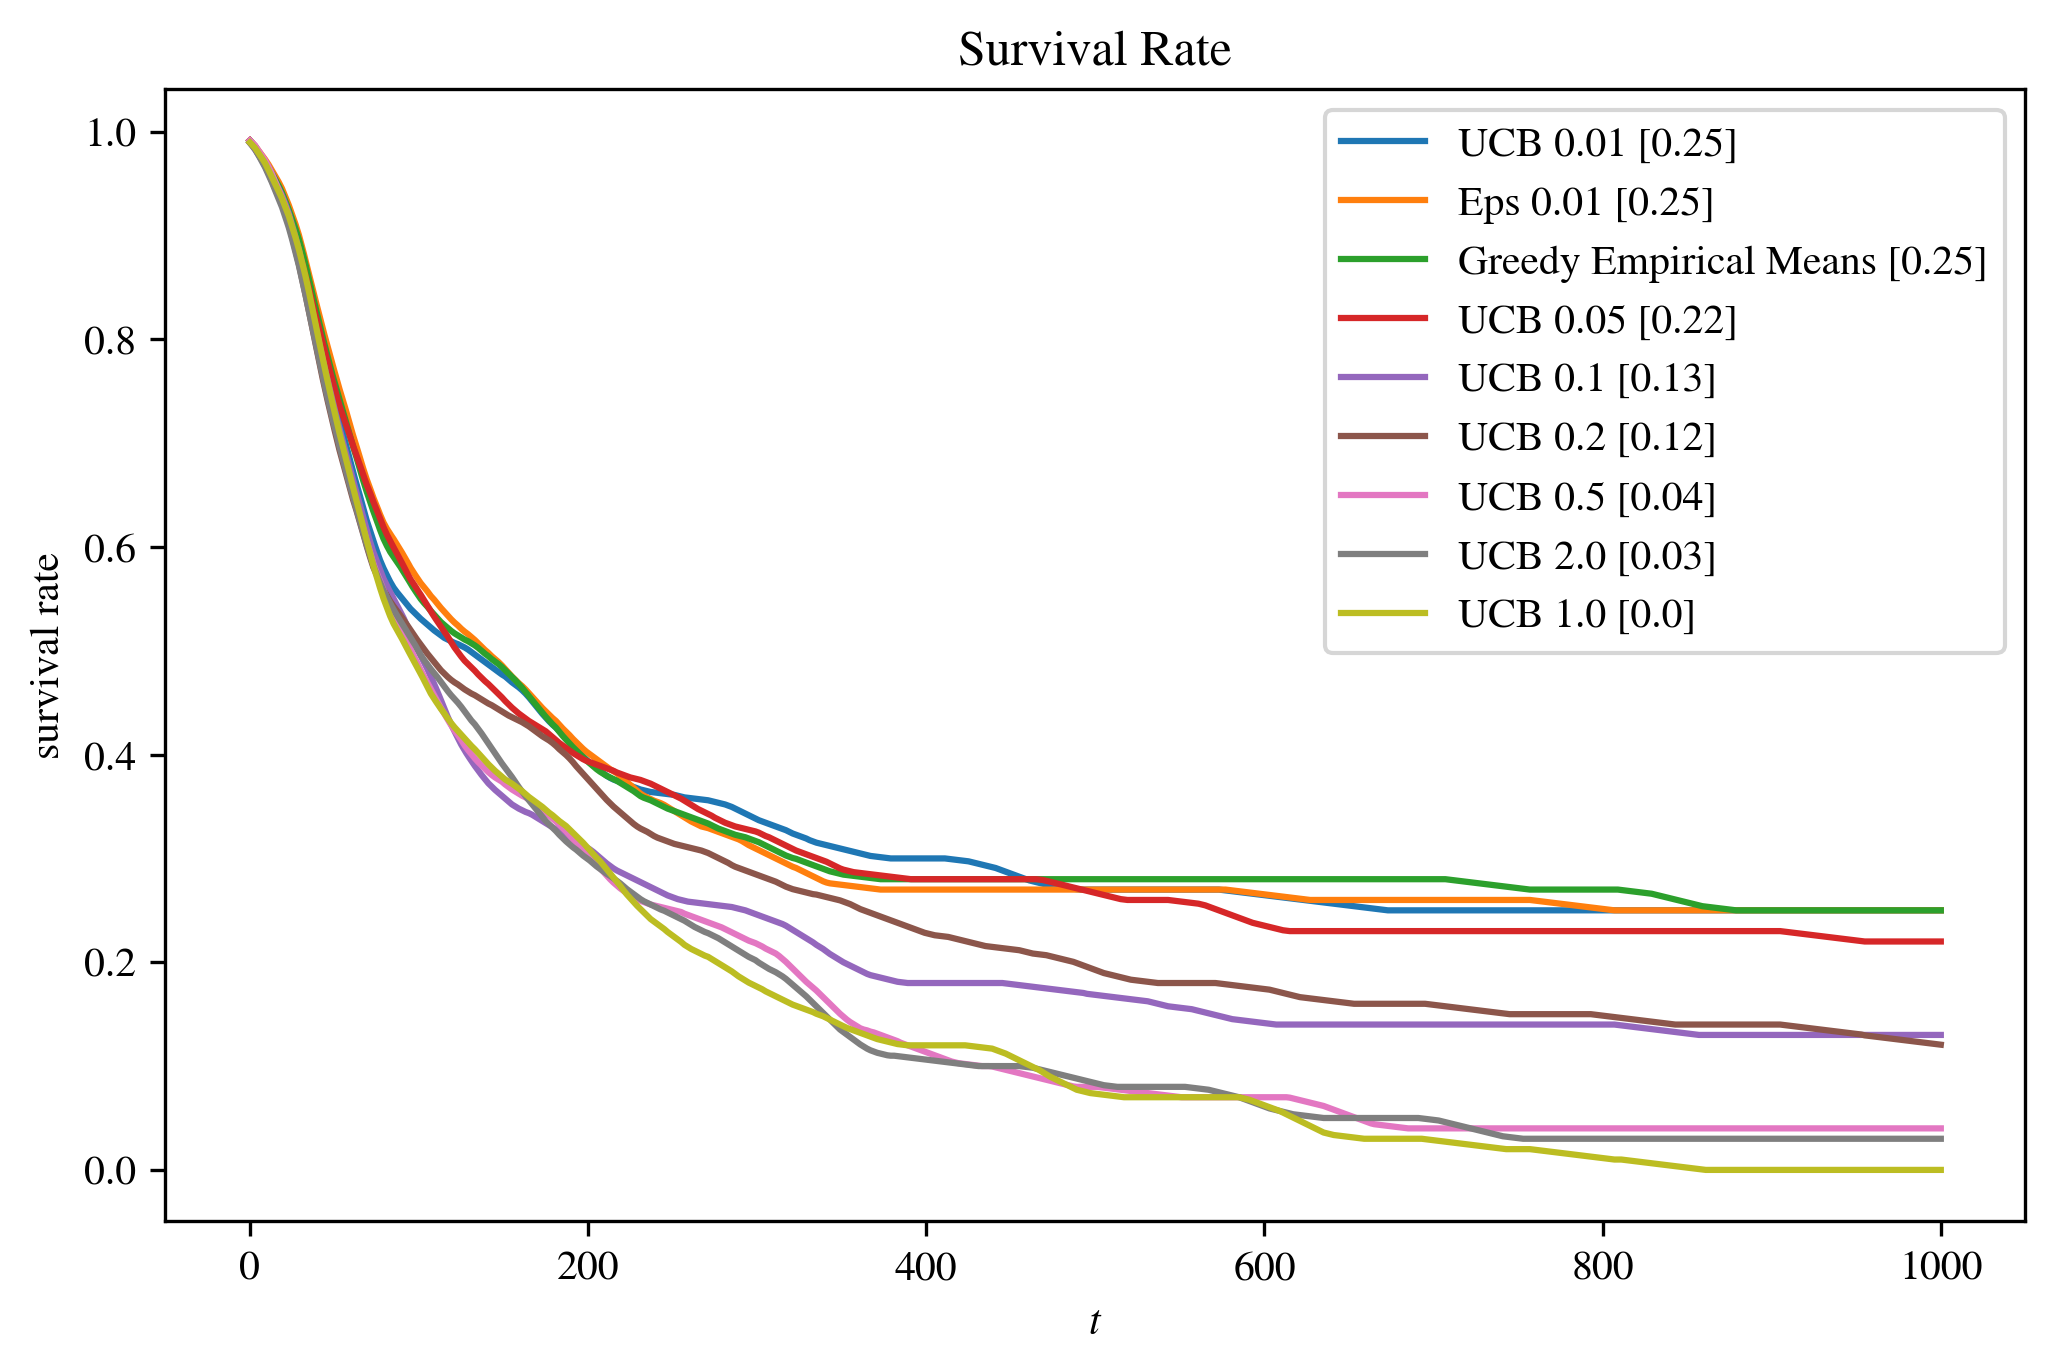

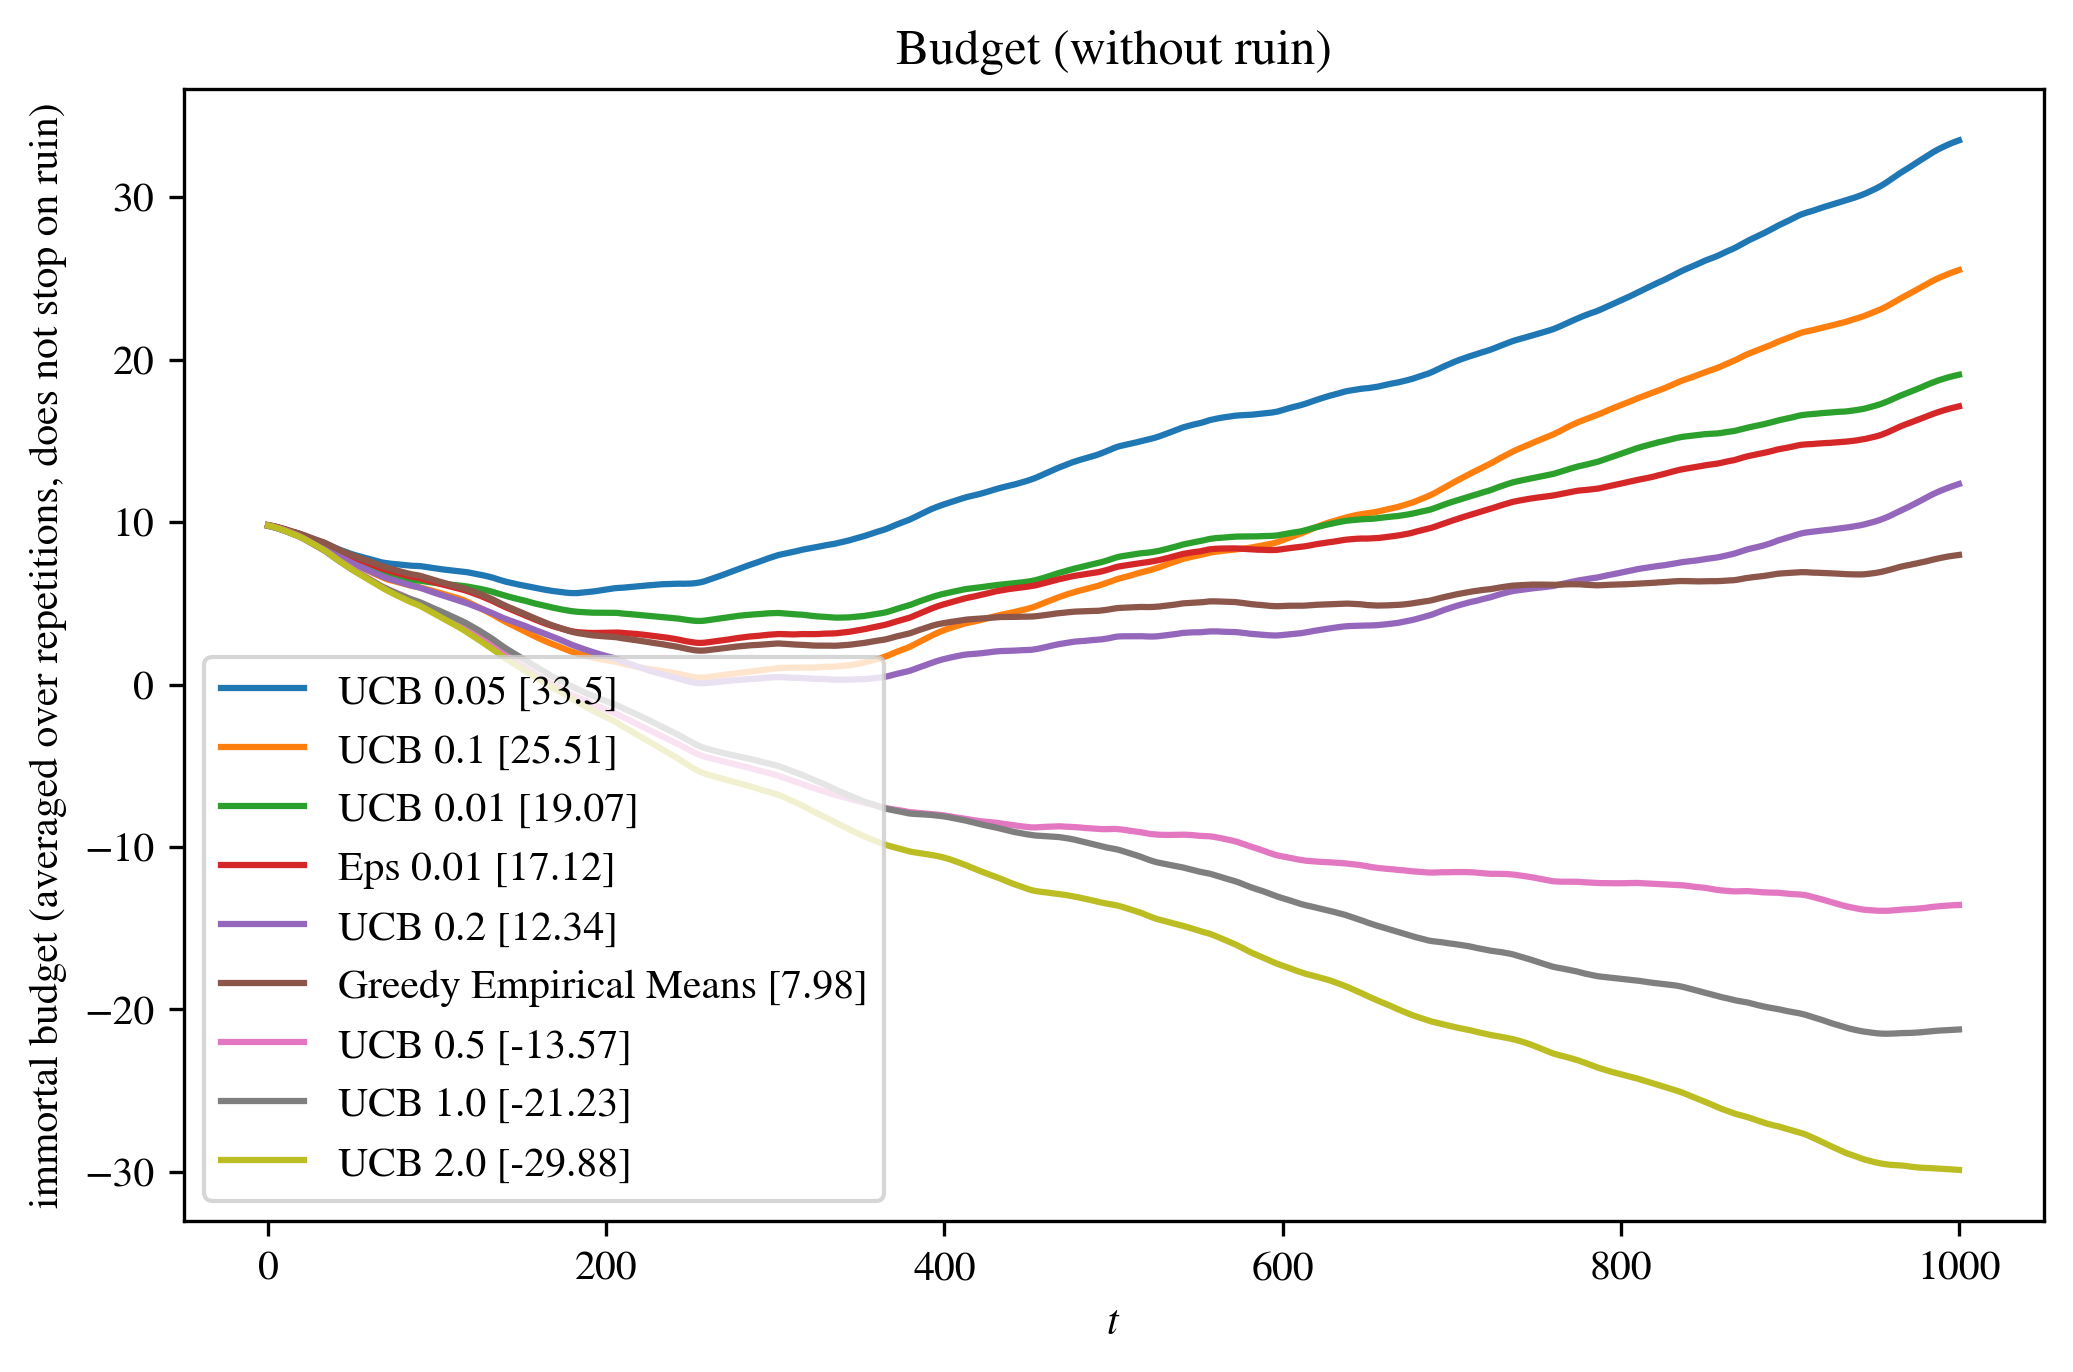

In [20]:
sim3.plot('mortal_budget', smooth_window=smooth_window)
sim3.plot('survival', smooth_window=smooth_window)
sim3.plot('immortal_budget', smooth_window=smooth_window)

In [21]:
#algorithms
algs = [
     GreedyPolicy(k, w=w),
     EpsilonGreedyPolicy(k, w=w, eps=0.1, label="Eps 0.1"), 
     EpsilonGreedyPolicy(k, w=w, eps=0.01, label="Eps 0.01"), 
     UCBPolicy(k, w=w, r_min=-1.0, r_max=1.0, alpha=0.05, label="UCB 0.05"),
     UCBPolicy(k, w=w, r_min=-1.0, r_max=1.0, alpha=0.5, label="UCB 0.5"),
     ThompsonPolicy(k, w=w, label="Thompson Sampling"),
     BayesUCBPolicy(k, w=w, label="Bayes-UCB"),
     PositiveGreedyPolicy(k, w=w, label="Positive Greedy")
    ]


In [22]:
#time-horizon
h = 1000

#repetitions
n = 200

sim4 = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim4.run(tqdm_leave=True)


  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
../../packages/magb\magb\simulator.py:309: RuntimeWarning: invalid value encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


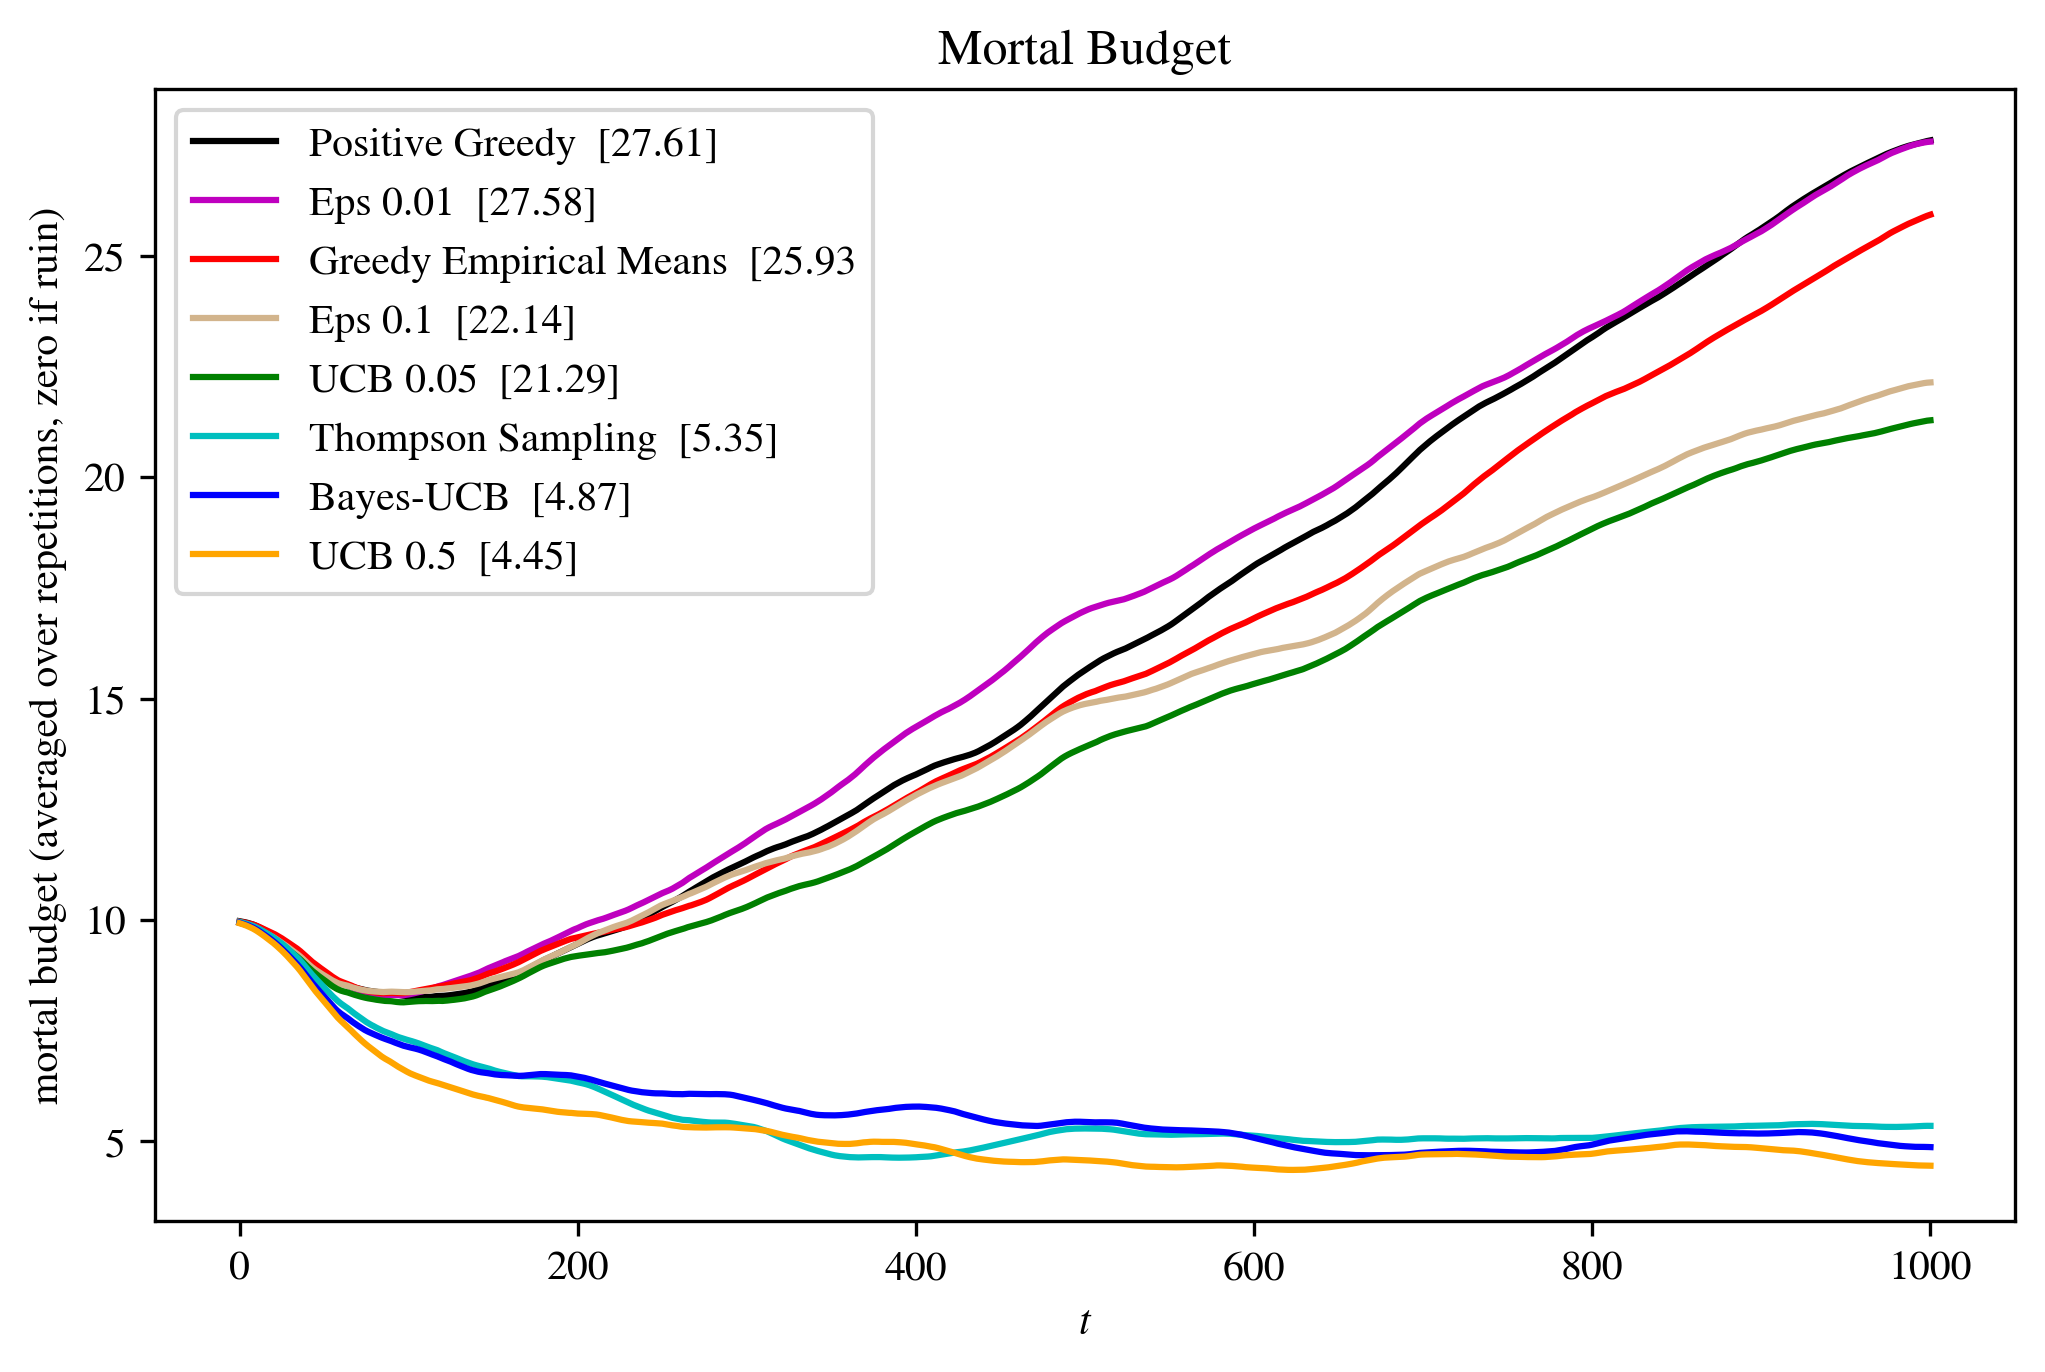

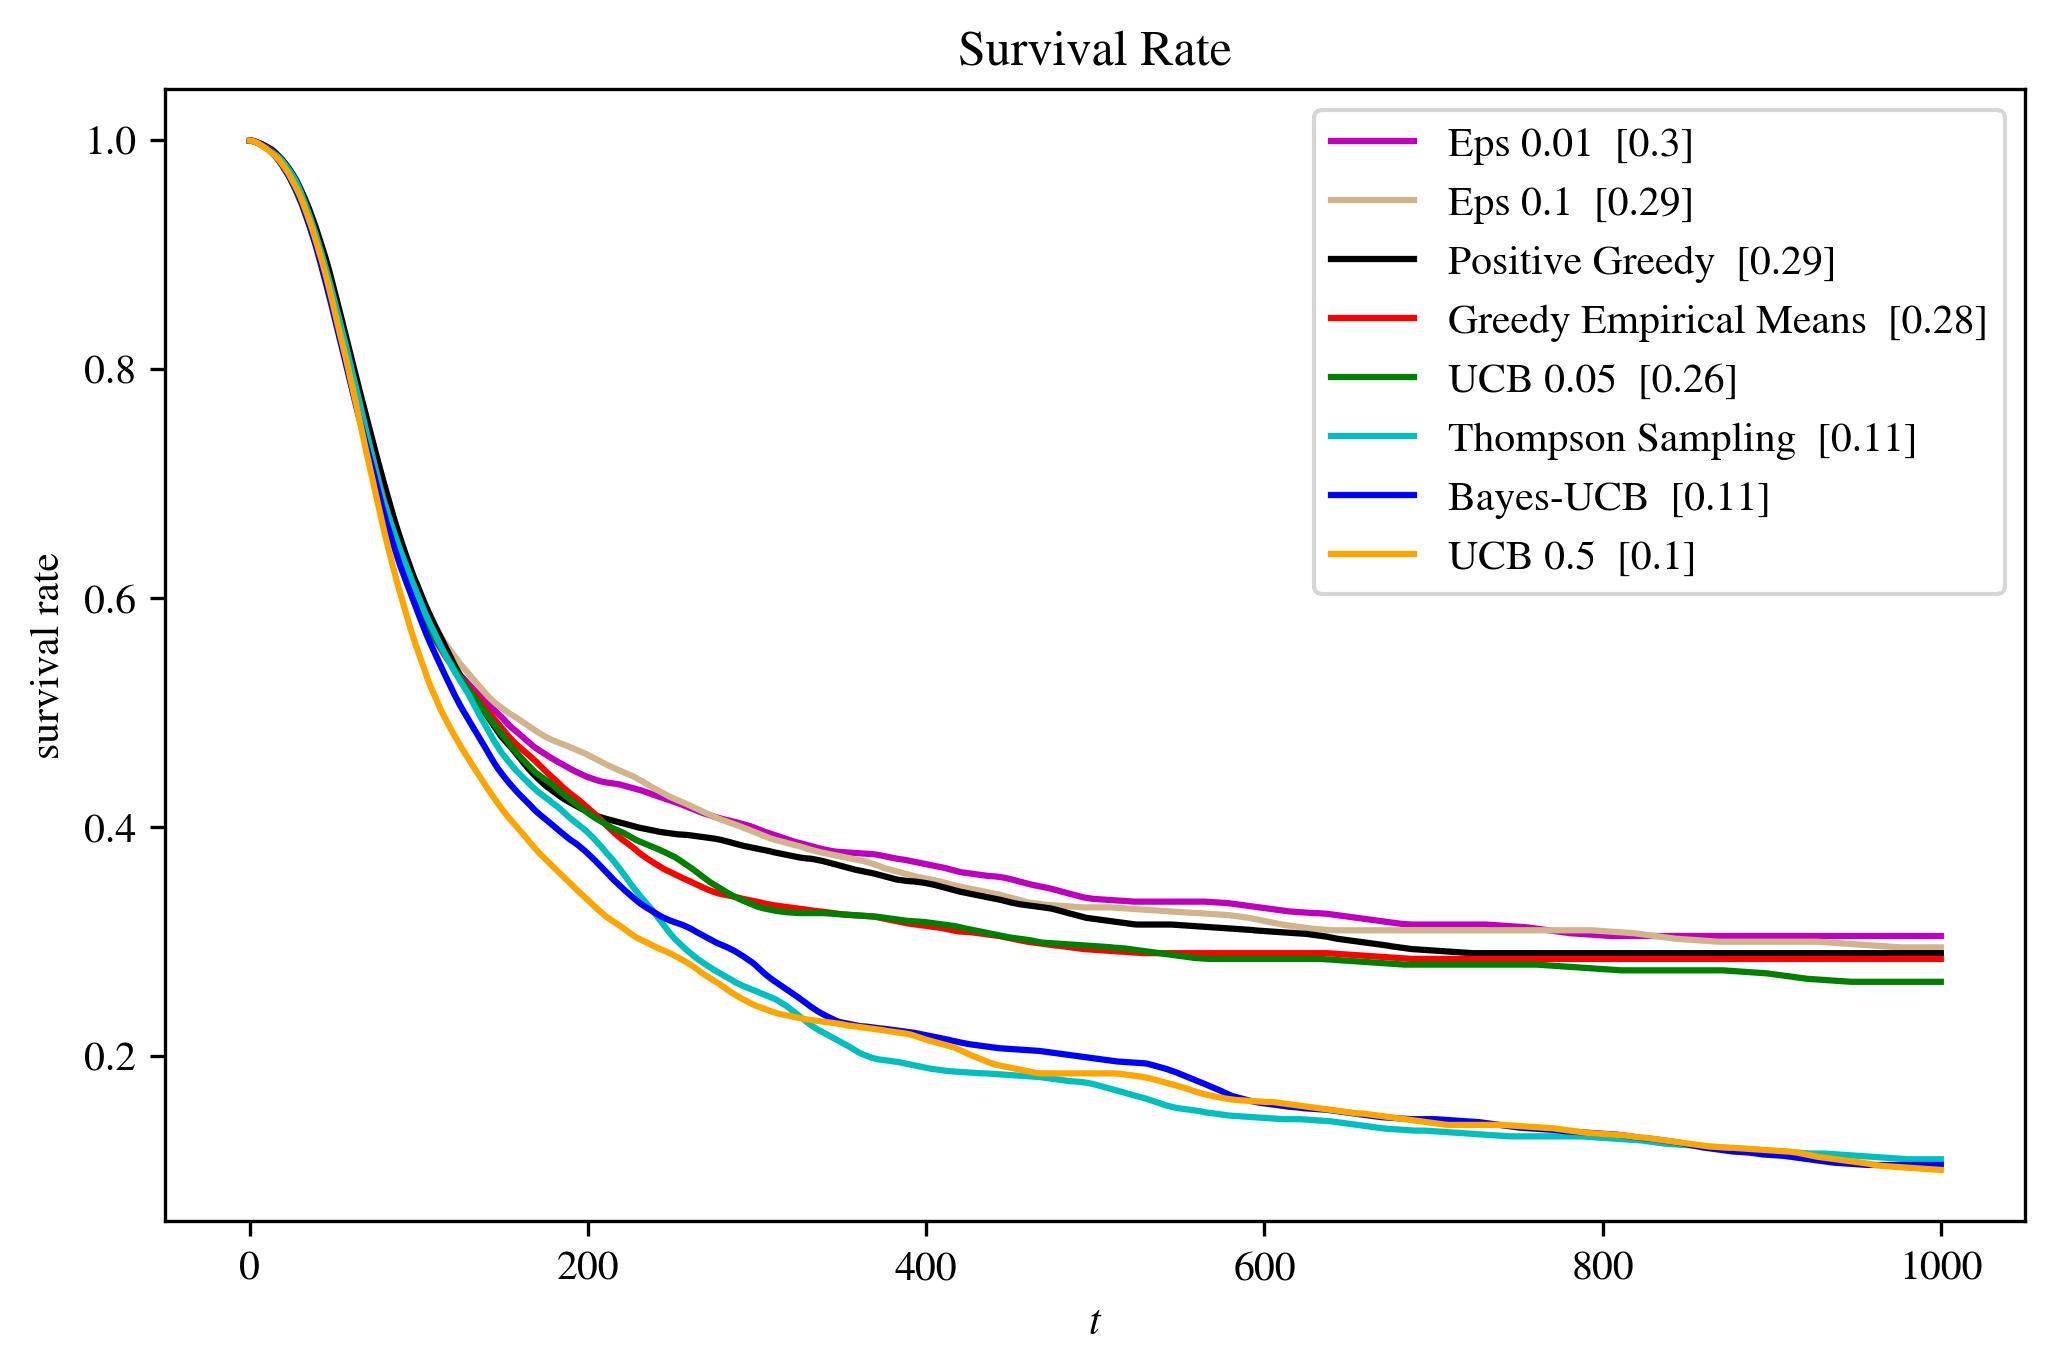

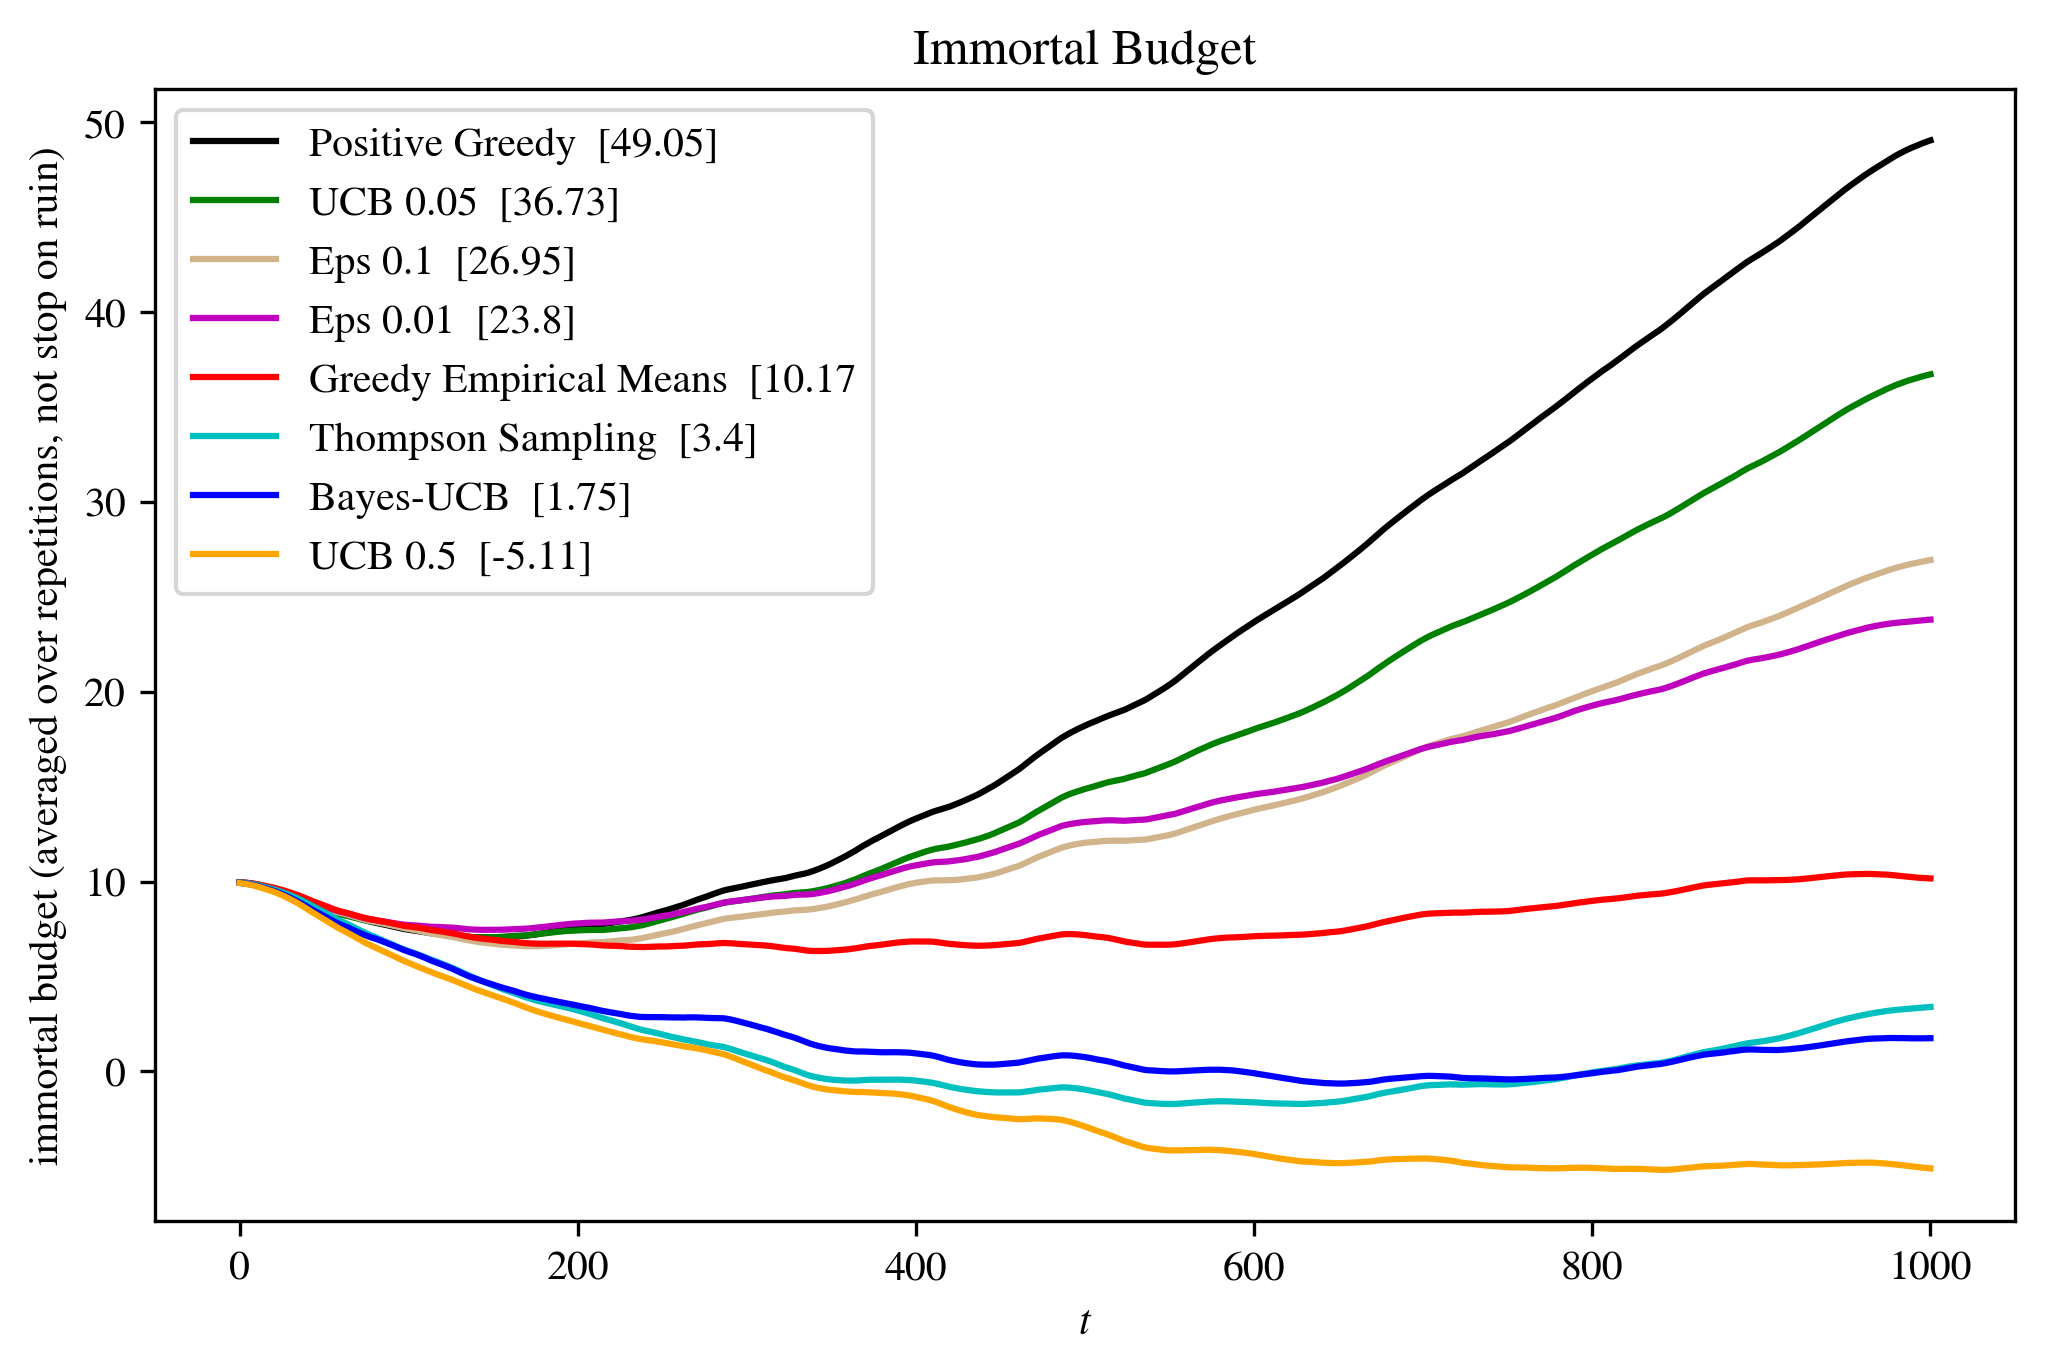

In [9]:
sim4.plot('mortal_budget', smooth_window=smooth_window)
sim4.plot('survival', smooth_window=smooth_window)
sim4.plot('immortal_budget', smooth_window=smooth_window)


  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


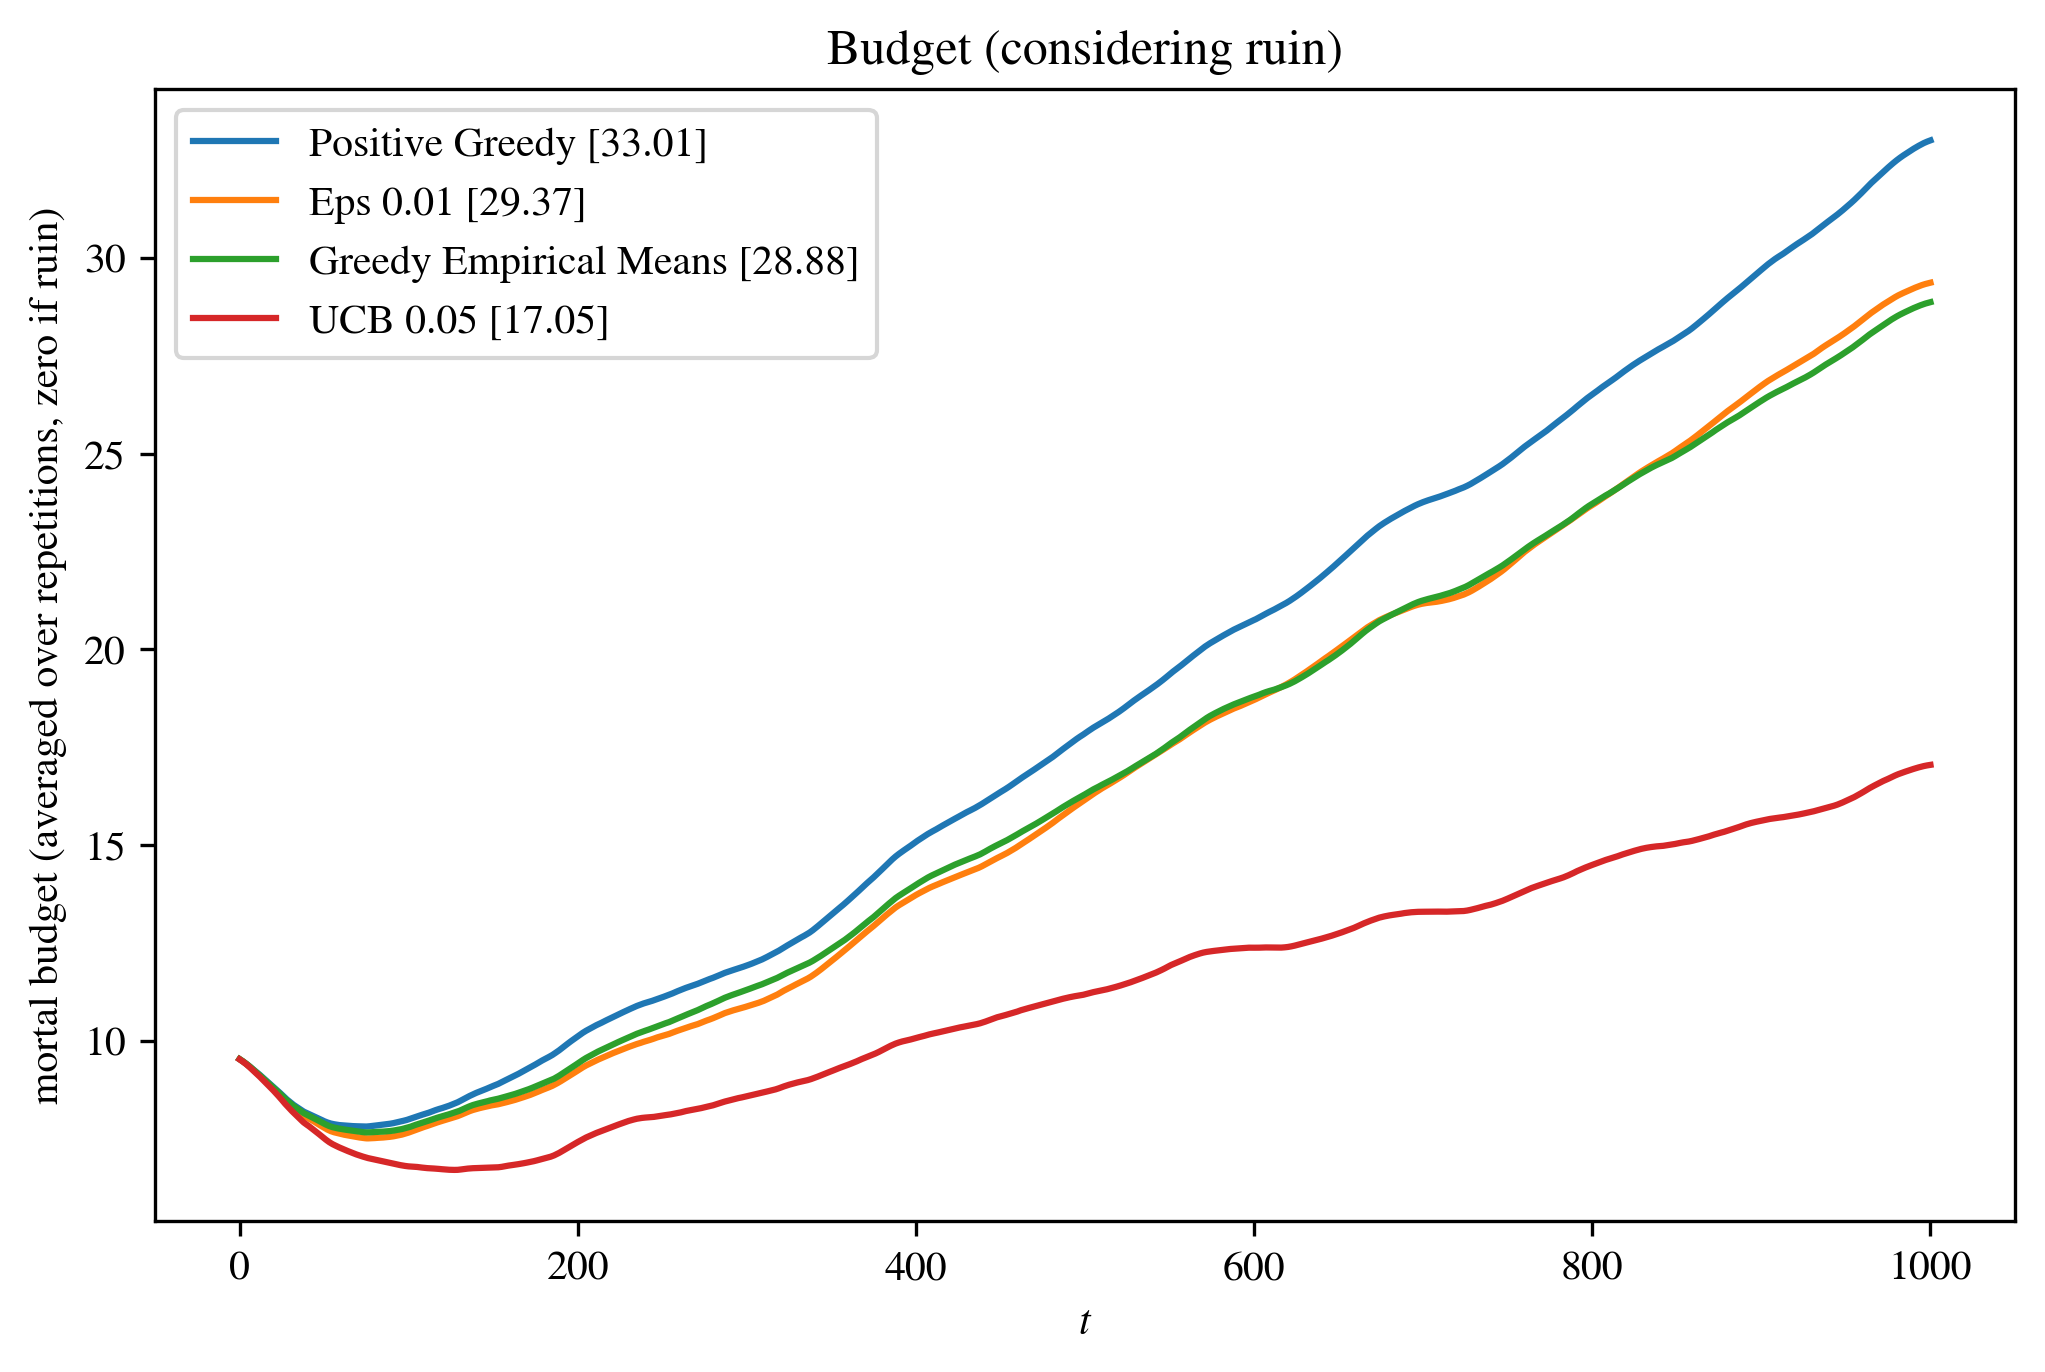

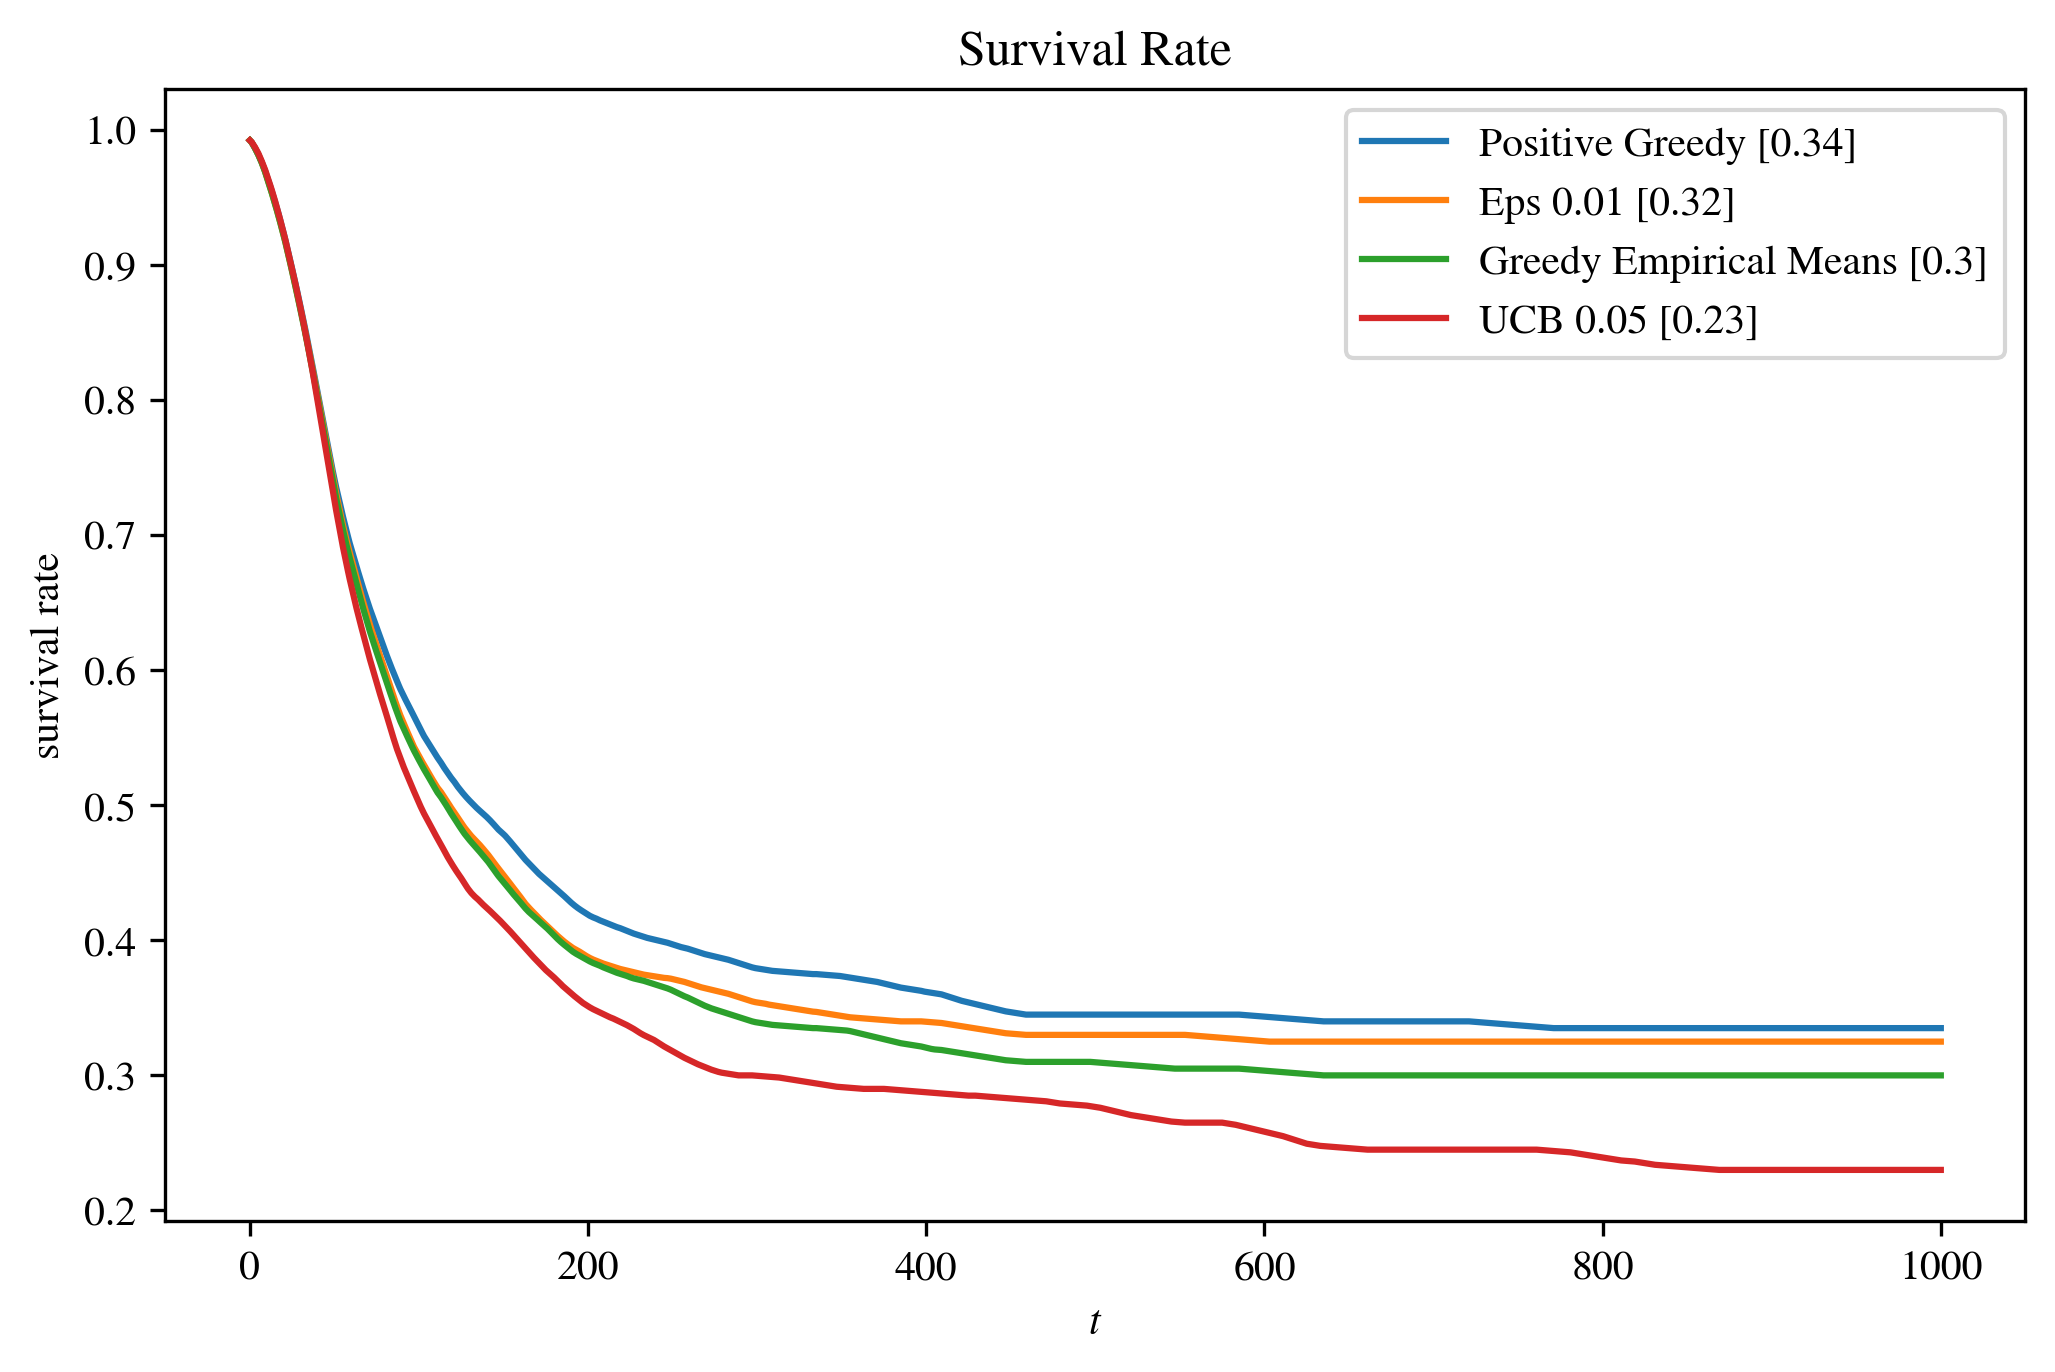

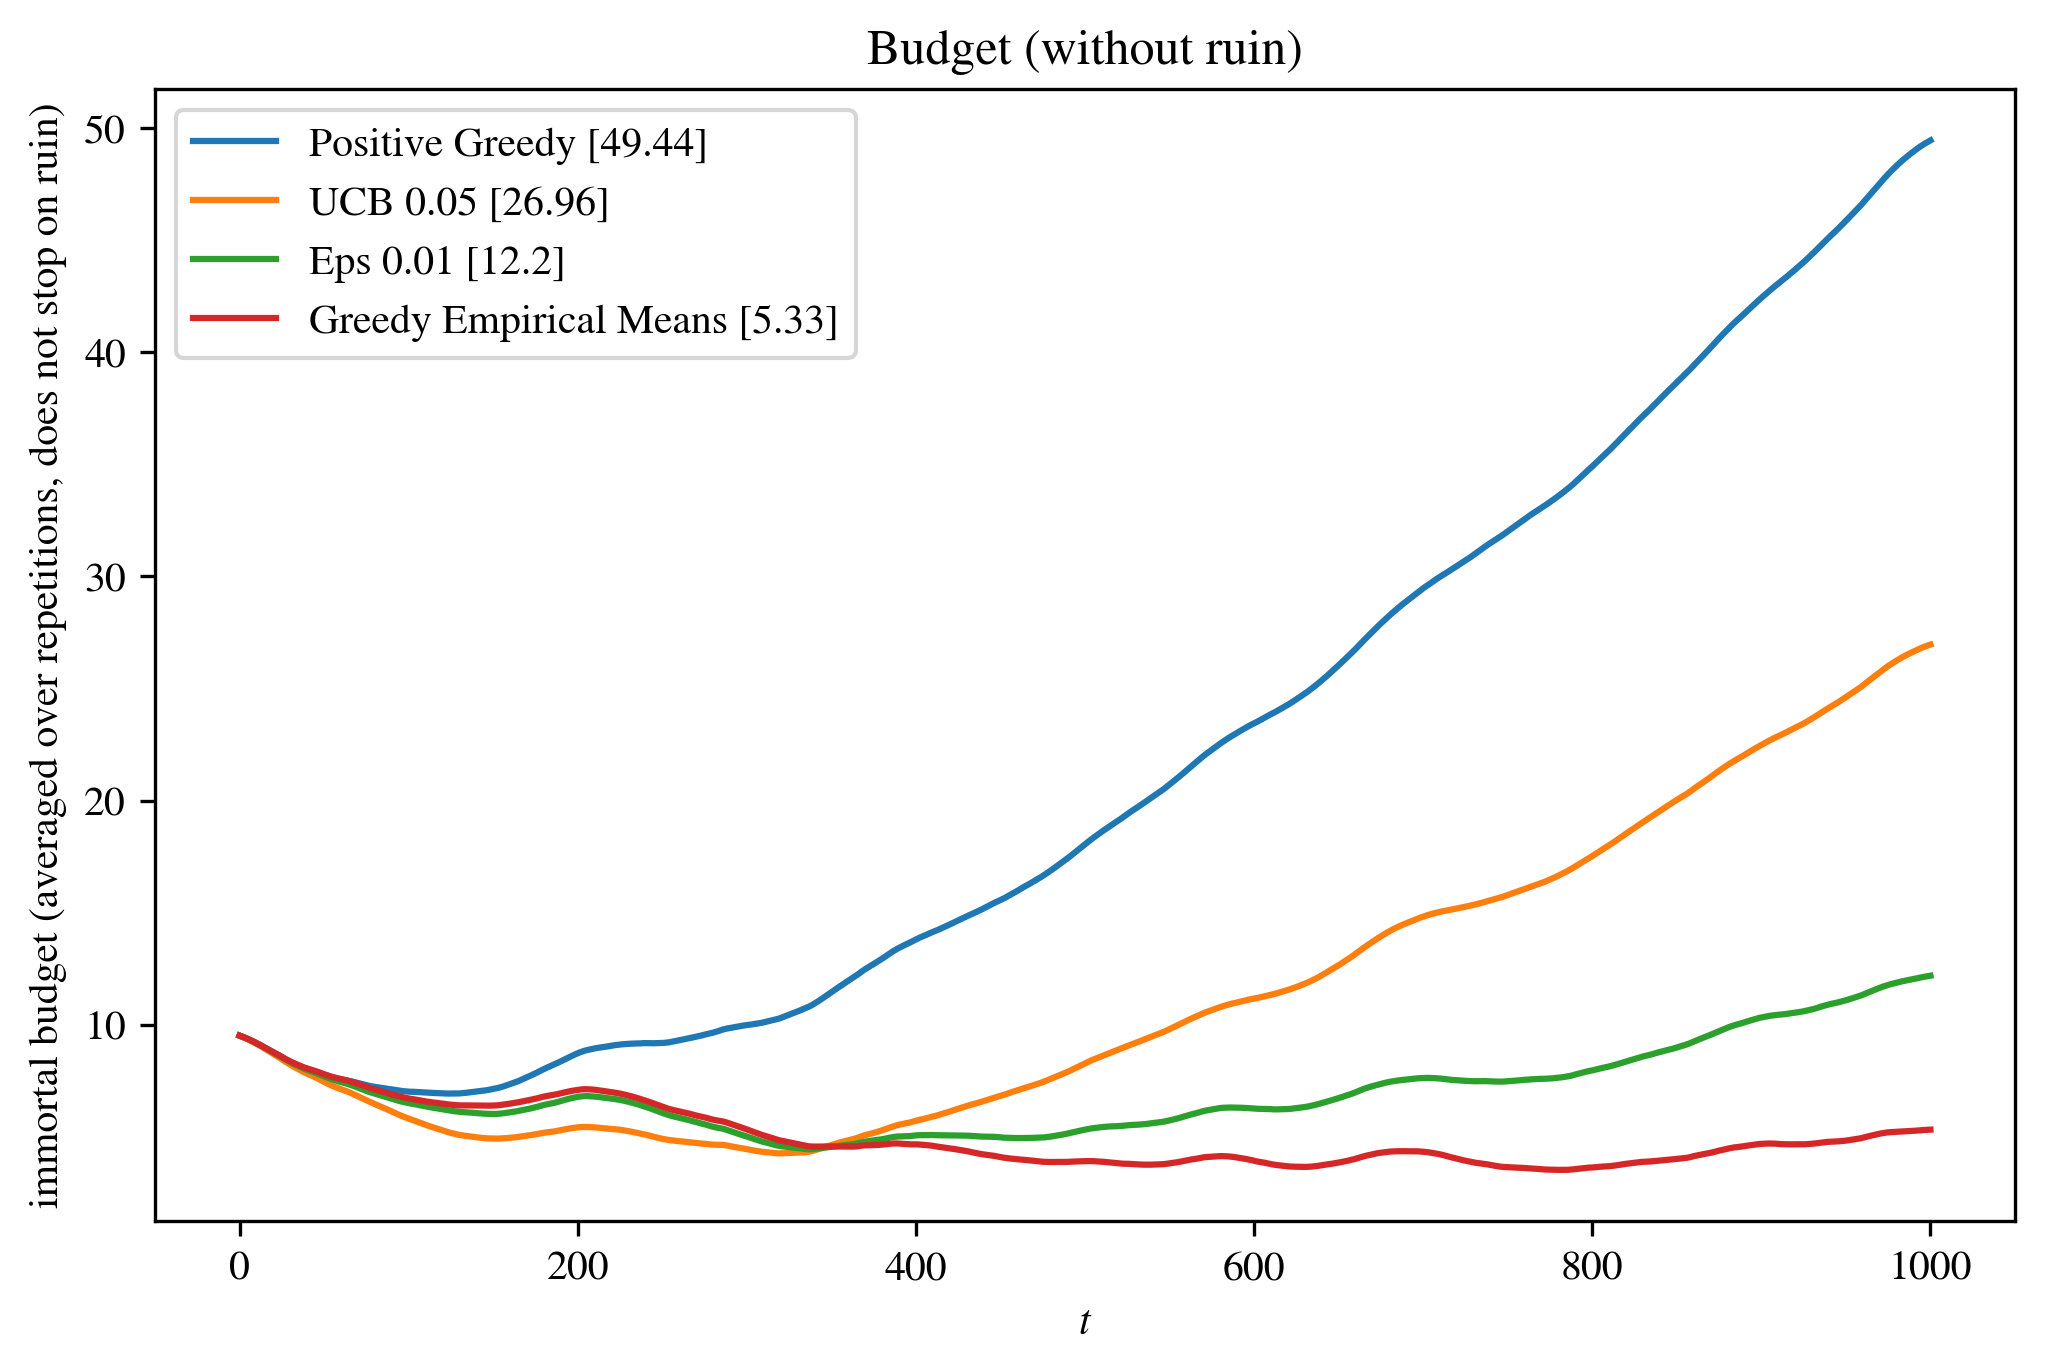

In [31]:
#algorithms
algs = [
     GreedyPolicy(k, w=w),
     EpsilonGreedyPolicy(k, w=w, eps=0.01, label="Eps 0.01"),
     UCBPolicy(k, w=w, r_min=-1.0, r_max=1.0, alpha=0.05, label="UCB 0.05"),
     #GamblerUCBPolicy(k, w=w, r_min=-1.0, r_max=1.0, alpha=0.05, label="Gambler UCB 0.05")
     PositiveGreedyPolicy(k, w=w, label="Positive Greedy")
    ]

#time-horizon
h = 1000

#repetitions
n = 200

sim5 = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim5.run(tqdm_leave=True)

sim5.plot('mortal_budget', smooth_window=smooth_window)
sim5.plot('survival', smooth_window=smooth_window)
sim5.plot('immortal_budget', smooth_window=smooth_window)